In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#from feature_engine.outlier_removers import Winsorizer

In [248]:
!pip install -U feature-engine
#from feature_engine.outlier_removers import Winsorizer

In [249]:
df = pd.read_excel("msga-order.xlsx")

In [250]:
df.head()

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount
0,WMA220501001925,9.884887e+09,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0
1,WMA220501011241,9.419739e+09,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0
2,WMA220501013210,9.035571e+09,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0
3,WMA220501013819,9.035571e+09,2022-05-01 01:38:19.627,AOD22000003,ACC22000009,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,990J0M65MU0-010,1.0,1315.0,1315.0,1315.0
4,WMA220501062333,8.801445e+09,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0


In [251]:
df=df.dropna()
df1 = df.drop_duplicates(subset = ["MobileNo"])
df1

df['MobileNo'] = df['MobileNo'].astype('int64') 
df

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount
0,WMA220501001925,9884887073,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0
1,WMA220501011241,9419738830,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0
2,WMA220501013210,9035570879,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0
3,WMA220501013819,9035570879,2022-05-01 01:38:19.627,AOD22000003,ACC22000009,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,990J0M65MU0-010,1.0,1315.0,1315.0,1315.0
4,WMA220501062333,8801444525,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11865,WMA220831222349,7994330730,2022-08-31 22:23:49.527,AOD22000019,ACC22000030,ktabdulnasar1959@gmail.com,Abdul Nasar K T,"Sana House, Karanthat","Po Karanthat, Kunnaru, Via) Ramanthali",Near Kunnaru AUP School,KANNUR,KERALA,990J0M66T13-090,1.0,290.0,0.0,290.0
11867,WMA220831223516,9811829429,2022-08-31 22:35:16.750,AOD22000049,ACC22000093,Santhoshnva0004@gmail.com,Mullu siva santhosh Kumar,"House no 92 , first floor",Sector 10,Behind civil hospital,GURGAON,HARYANA,990J0M72RA3-010,1.0,350.0,350.0,350.0
11868,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M999L1-440,1.0,550.0,827.0,1799.0
11869,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M99911-110,1.0,1249.0,827.0,1799.0


In [252]:
monetary = df.groupby('MobileNo')['TotalBillingAmount'].sum()
monetary = monetary.reset_index()
monetary.tail()

,MobileNo,TotalBillingAmount
4879,9999988328,6276.0
4880,9999990345,1130.0
4881,9999997468,2111.0
4882,9999998651,11652.0
4883,9999999999,425.0


In [253]:
#here we are calculating recency by subtracting the very recent date with the last transaction date of the customers.

df['OrderDate'] = pd.to_datetime(df['OrderDate'],format='%Y-%m-%d %H:%M:%S')
df['Diff'] = max(df['OrderDate']) - df['OrderDate']
recency = df.groupby('MobileNo')['Diff'].min()
recency = recency.reset_index()
recency.head()

,MobileNo,Diff
0,6000567125,3 days 03:04:55.500000
1,6005564227,102 days 10:35:29.203000
2,6200284850,54 days 02:41:20.340000
3,6238130185,76 days 01:28:03.207000
4,6238133938,11 days 03:41:02.073000


In [254]:
recency

,MobileNo,Diff
0,6000567125,3 days 03:04:55.500000
1,6005564227,102 days 10:35:29.203000
2,6200284850,54 days 02:41:20.340000
3,6238130185,76 days 01:28:03.207000
4,6238133938,11 days 03:41:02.073000
...,...,...
4879,9999988328,93 days 01:41:49.100000
4880,9999990345,38 days 08:13:27.140000
4881,9999997468,97 days 05:22:29.907000
4882,9999998651,65 days 07:52:34.520000


In [255]:
frequency = df.groupby('MobileNo')['OrderDate'].count()
frequency = frequency.reset_index()
frequency.head()

,MobileNo,OrderDate
0,6000567125,1
1,6005564227,1
2,6200284850,2
3,6238130185,1
4,6238133938,3


In [256]:
df.OrderDate.max()

Timestamp('2022-08-31 22:57:27.370000')

In [257]:
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,MobileNo,Diff
0,6000567125,3
1,6005564227,102
2,6200284850,54
3,6238130185,76
4,6238133938,11


In [258]:
rfm = pd.merge(recency,frequency,on='MobileNo', how='inner')

In [259]:
rfm= pd.merge(rfm,monetary,on='MobileNo', how='inner')


In [260]:
rfm.columns = ['MobileNo','Recency','Frequency','Monetary']

In [261]:
rfm

,MobileNo,Recency,Frequency,Monetary
0,6000567125,3,1,790.0
1,6005564227,102,1,490.0
2,6200284850,54,2,1580.0
3,6238130185,76,1,350.0
4,6238133938,11,3,2475.0
...,...,...,...,...
4879,9999988328,93,6,6276.0
4880,9999990345,38,1,1130.0
4881,9999997468,97,1,2111.0
4882,9999998651,65,4,11652.0


In [262]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,790.0,1,3
1,490.0,1,102
2,1580.0,2,54
3,350.0,1,76
4,2475.0,3,11
...,...,...,...
4879,6276.0,6,93
4880,1130.0,1,38
4881,2111.0,1,97
4882,11652.0,4,65


In [263]:
rfm_normalized=scaler.fit_transform(rfm_normalized)
rfm_normalized=pd.DataFrame(rfm_normalized)
rfm_normalized

,0,1,2
0,-0.162431,-0.484199,-1.514537
1,-0.172883,-0.484199,1.303551
2,-0.134908,-0.000396,-0.062794
3,-0.177761,-0.484199,0.563447
4,-0.103726,0.483406,-1.286812
...,...,...,...
4879,0.028700,1.934814,1.047361
4880,-0.150586,-0.484199,-0.518243
4881,-0.116408,-0.484199,1.161224
4882,0.216000,0.967209,0.250327


In [264]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=4)

In [265]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    
    ssd.append(kmeans.inertia_)

In [266]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_normalized)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_normalized,cluster_labels)
    print("For n_cluster={0},score is{1}".format(num_clusters,silhouette_avg))

For n_cluster=2,score is0.430469153972162
For n_cluster=3,score is0.43540544452784646
For n_cluster=4,score is0.48092944842367275
For n_cluster=5,score is0.4905034936979532
For n_cluster=6,score is0.4223285438961725
For n_cluster=7,score is0.42812103720068
For n_cluster=8,score is0.44658413814678416


In [267]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3)

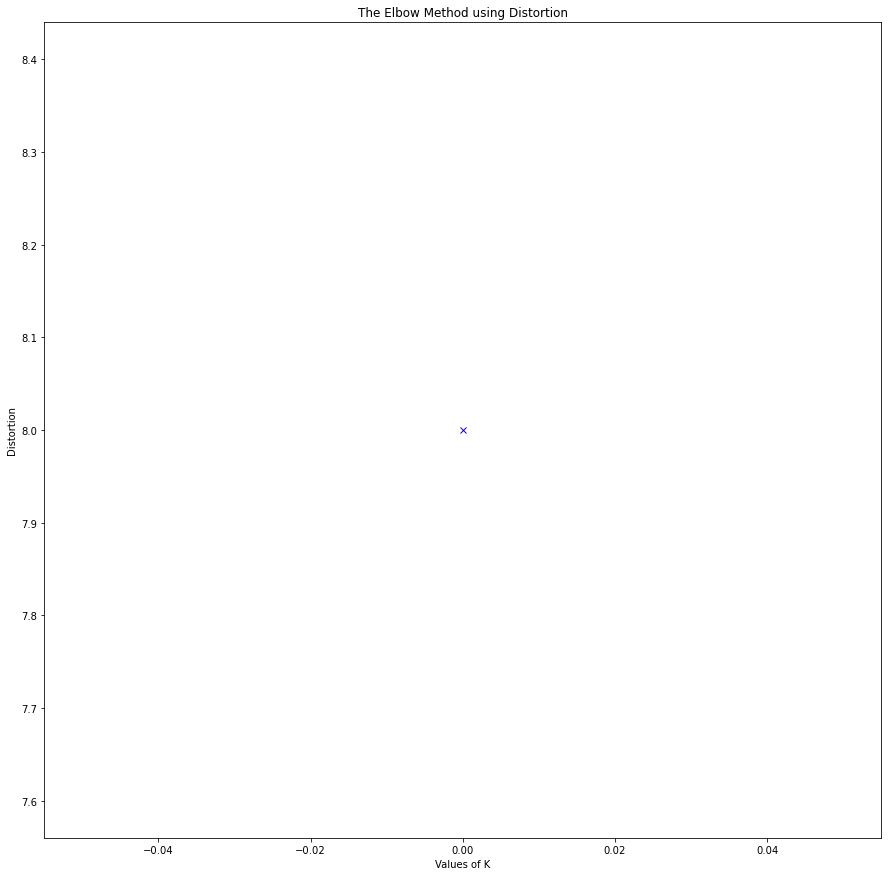

In [268]:
plt.plot(num_clusters,'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [269]:
rfm_normalized.loc[:,'MobileNo'] = rfm['MobileNo']

In [270]:
rfm_normalized

,0,1,2,MobileNo
0,-0.162431,-0.484199,-1.514537,6000567125
1,-0.172883,-0.484199,1.303551,6005564227
2,-0.134908,-0.000396,-0.062794,6200284850
3,-0.177761,-0.484199,0.563447,6238130185
4,-0.103726,0.483406,-1.286812,6238133938
...,...,...,...,...
4879,0.028700,1.934814,1.047361,9999988328
4880,-0.150586,-0.484199,-0.518243,9999990345
4881,-0.116408,-0.484199,1.161224,9999997468
4882,0.216000,0.967209,0.250327,9999998651


In [271]:
rfm_normalized['cluster']=kmeans.labels_
rfm_normalized.head(20)

,0,1,2,MobileNo,cluster
0,-0.162431,-0.484199,-1.514537,6000567125,1
1,-0.172883,-0.484199,1.303551,6005564227,0
2,-0.134908,-0.000396,-0.062794,6200284850,1
3,-0.177761,-0.484199,0.563447,6238130185,0
4,-0.103726,0.483406,-1.286812,6238133938,1
5,-0.145011,-0.484199,0.990430,6238303435,0
6,-0.124107,-0.484199,0.364189,6261042467,0
7,-0.151108,-0.484199,0.534982,6263719628,0
8,-0.116408,-0.484199,-0.205122,6280648031,1
9,-0.014013,-0.484199,-1.087554,6281744189,1


<AxesSubplot:xlabel='cluster', ylabel='0'>

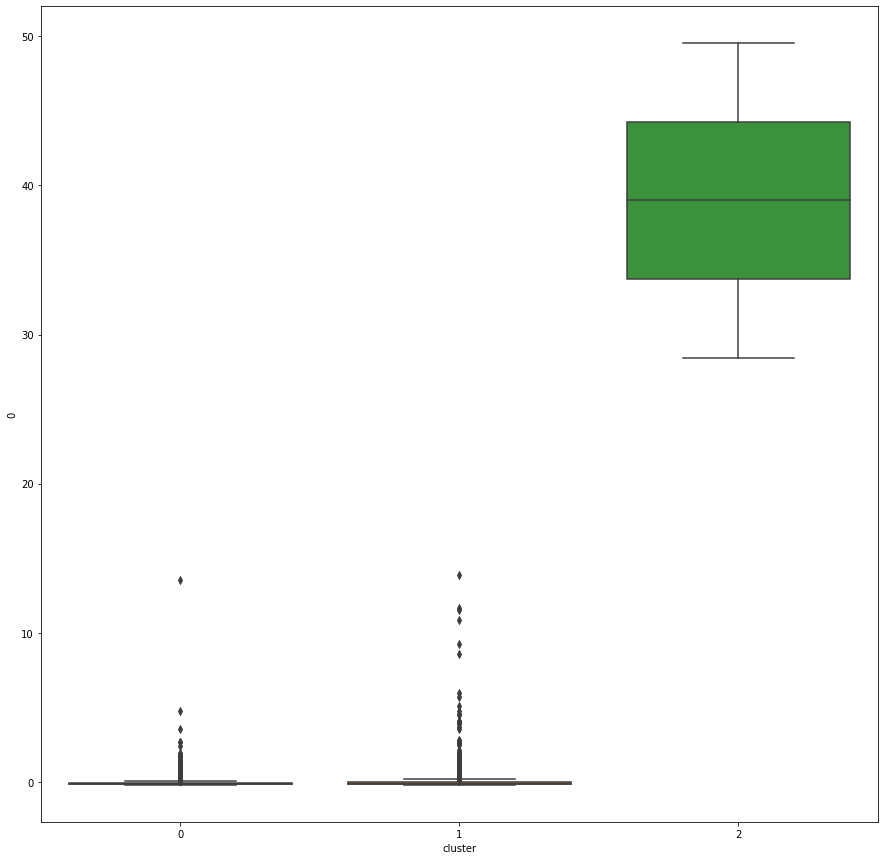

In [272]:
#for Monetary
sns.boxplot(x='cluster', y=0,data = rfm_normalized)

In [273]:
rfm_normalized.columns

Index([0, 1, 2, 'MobileNo', 'cluster'], dtype='object')

<AxesSubplot:xlabel='cluster', ylabel='1'>

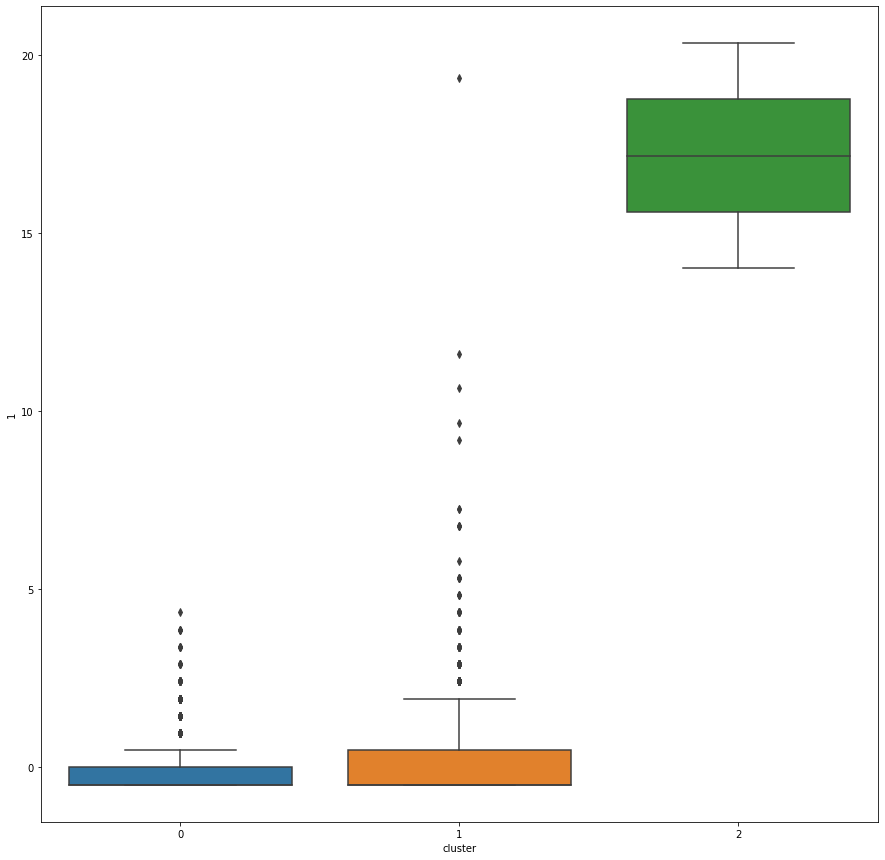

In [274]:
#for frequency
sns.boxplot(x='cluster', y=1, data=rfm_normalized)

<AxesSubplot:xlabel='cluster', ylabel='2'>

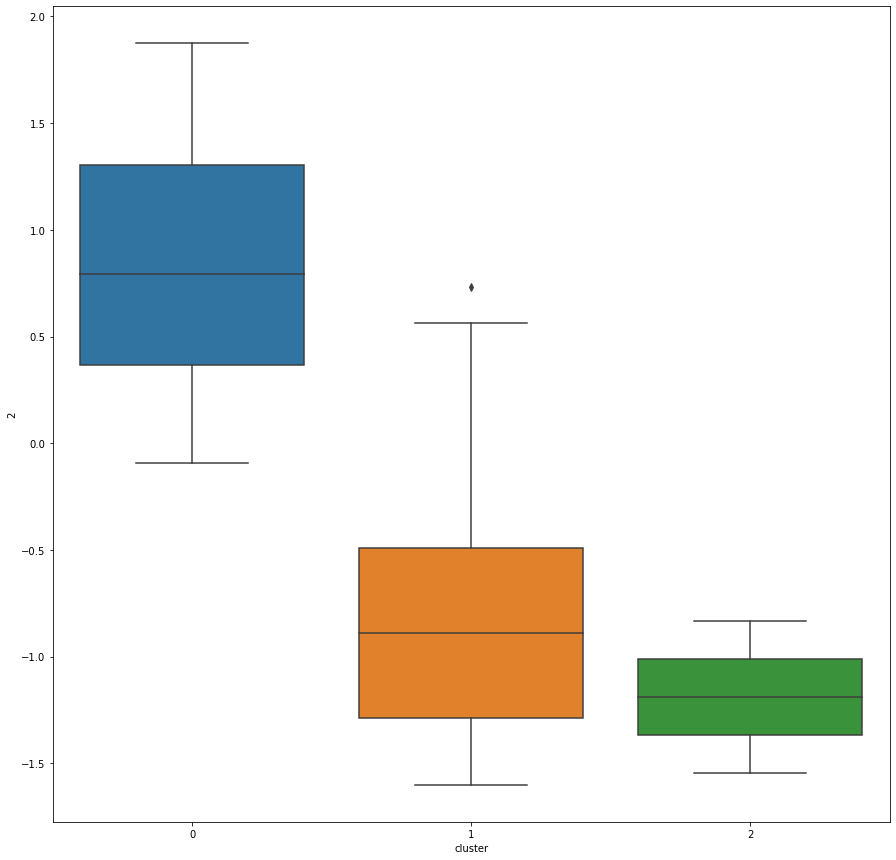

In [275]:
#for Recency
sns .boxplot(x='cluster',y=2,data=rfm_normalized)

C:\Users\AGL\AppData\Local\Temp\ipykernel_11860\2818172786.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


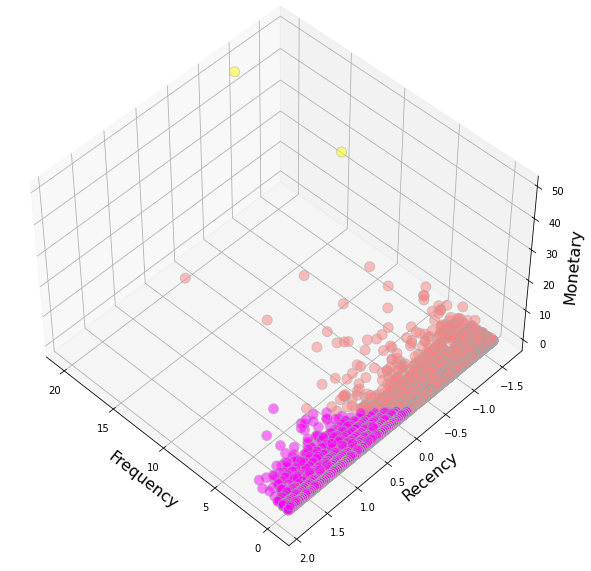

In [276]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"]=(15,15)
fig=plt.figure()
plt.clf()
ax = Axes3D(fig,
            rect = [0, 0, .95, .5],
            elev = 48,
            azim = 134)

plt.cla()
ax.scatter(rfm_normalized[1],rfm_normalized[2],rfm_normalized[0],
           c=rfm_normalized['cluster'],
           s=100,
           cmap = 'spring',
           alpha = 0.5,
           edgecolor = 'darkgrey')
ax.set_xlabel('Frequency',fontsize=16)
ax.set_ylabel('Recency',fontsize=16)
ax.set_zlabel('Monetary',fontsize=16)

plt.show()

In [277]:

quantiles = rfm.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [278]:
segmented_rfm = rfm.copy()

In [279]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [280]:
segmented_rfm['R'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,MobileNo,Recency,Frequency,Monetary,R,F,M
0,6000567125,3,1,790.0,1,4,4
1,6005564227,102,1,490.0,4,4,4
2,6200284850,54,2,1580.0,2,2,3
3,6238130185,76,1,350.0,3,4,4
4,6238133938,11,3,2475.0,1,1,2


In [281]:
segmented_rfm['RFM_Segment_score'] = segmented_rfm.M*(segmented_rfm.F*(1+120/segmented_rfm.R))
segmented_rfm.head(20)


,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score
0,6000567125,3,1,790.0,1,4,4,1936.0
1,6005564227,102,1,490.0,4,4,4,496.0
2,6200284850,54,2,1580.0,2,2,3,366.0
3,6238130185,76,1,350.0,3,4,4,656.0
4,6238133938,11,3,2475.0,1,1,2,242.0
5,6238303435,91,1,1290.0,4,4,3,372.0
6,6261042467,69,1,1890.0,3,4,2,328.0
7,6263719628,75,1,1115.0,3,4,3,492.0
8,6280648031,49,1,2111.0,2,4,2,488.0
9,6281744189,18,1,5050.0,1,4,1,484.0


In [282]:
#segmented_rfm['RFM_Score'] = segmented_rfm[['R','F','M']].sum(axis=1)
segmented_rfm

,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score
0,6000567125,3,1,790.0,1,4,4,1936.0
1,6005564227,102,1,490.0,4,4,4,496.0
2,6200284850,54,2,1580.0,2,2,3,366.0
3,6238130185,76,1,350.0,3,4,4,656.0
4,6238133938,11,3,2475.0,1,1,2,242.0
...,...,...,...,...,...,...,...,...
4879,9999988328,93,6,6276.0,4,1,1,31.0
4880,9999990345,38,1,1130.0,2,4,3,732.0
4881,9999997468,97,1,2111.0,4,4,2,248.0
4882,9999998651,65,4,11652.0,3,1,1,41.0


In [283]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

KeyError: 'RFM_Segment'

In [284]:
segmented_rfm['RFM_Segment_score'].unique()

array([1936.,  496.,  366.,  656.,  242.,  372.,  328.,  492.,  488.,
        484.,  248., 1452.,   31.,  732.,   82.,  363.,  164.,   61.,
        246.,   41.,  968.,  121.,  123.,  122.,  976.,  244.,   62.,
        124.,  186.,  183.,  726.,   93.])

In [285]:
segmented_rfm.groupby('RFM_Segment_score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
                     mean      mean     mean count
RFM_Segment_score                                 
31.0                102.2       4.6  19017.5   172
41.0                 70.4       5.0  18545.0   202
61.0                 40.4       5.3  26434.3   218
62.0                100.8       2.6   6183.9   101
82.0                 70.5       2.7   6339.5   105
93.0                 99.6       3.2   1205.9     9
121.0                12.0       5.1  23064.2   246
122.0                41.2       2.9   5264.7    99
123.0                69.3       3.7   1285.8    10
124.0               104.9       1.8   3966.7   144
164.0                70.8       2.1   4167.7   115
183.0                39.4       3.5   1195.7    11
186.0               105.2       2.0   1169.8    25
242.0                11.9       2.7   6212.1   122
244.0                39.6       1.8   3983.2   148
246.0                72.9       2.0   1182.0    20
248.0               103.3       1.1   2091.6   170
328.0                71.0       1.1   1967.8   169
363.0                11.9       3.3   1267.6    21
366.0                40.1       2.0   1164.5    28
372.0               103.3       1.0   1277.1   325
484.0                12.8       1.8   3847.7   144
488.0                41.3       1.1   2046.3   180
492.0                71.1       1.0   1250.1   298
496.0               103.4       1.0    390.1   257
656.0                69.7       1.0    354.2   297
726.0                14.0       2.0   1125.2    21
732.0                41.7       1.0   1273.5   258
968.0                12.3       1.1   2104.6   180
976.0                40.4       1.0    365.5   273
1452.0               11.4       1.0   1246.3   216
1936.0               12.1       1.0    377.4   300

In [286]:
from scipy import stats
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: 0.11799122094921739, : SkewtestResult(statistic=3.3599481351613303, pvalue=0.0007795710592311088)
Frequency's: Skew: 6.390219785718044, : SkewtestResult(statistic=64.36423129527152, pvalue=0.0)


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Monetary's: Skew: 32.222422113066564, : SkewtestResult(statistic=102.1064420073399, pvalue=0.0)


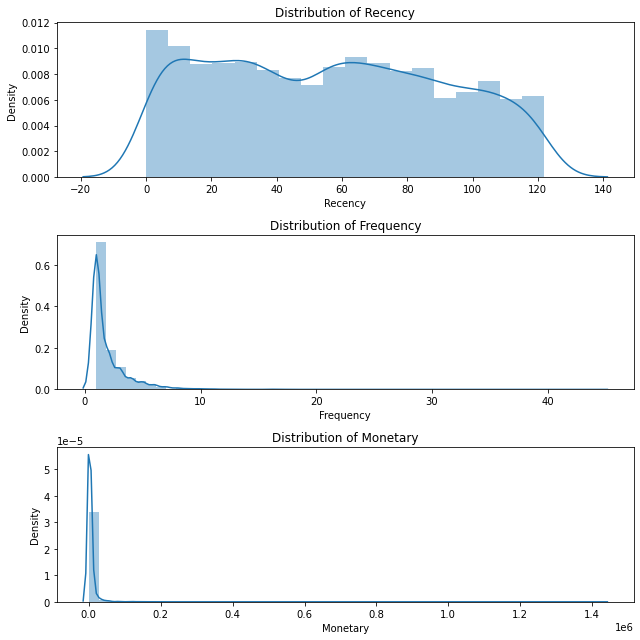

In [287]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(rfm,'Monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [288]:
df_rfm_log = rfm.copy()

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Recency's: Skew: -1.456748651405287, : SkewtestResult(statistic=-31.351907111374175, pvalue=9.16378310828261e-216)
Frequency's: Skew: 1.5943032475567045, : SkewtestResult(statistic=33.21063190154927, pvalue=7.560904474160827e-242)


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Monetary's: Skew: 0.1093153852183237, : SkewtestResult(statistic=3.114399560492382, pvalue=0.0018431969897994213)


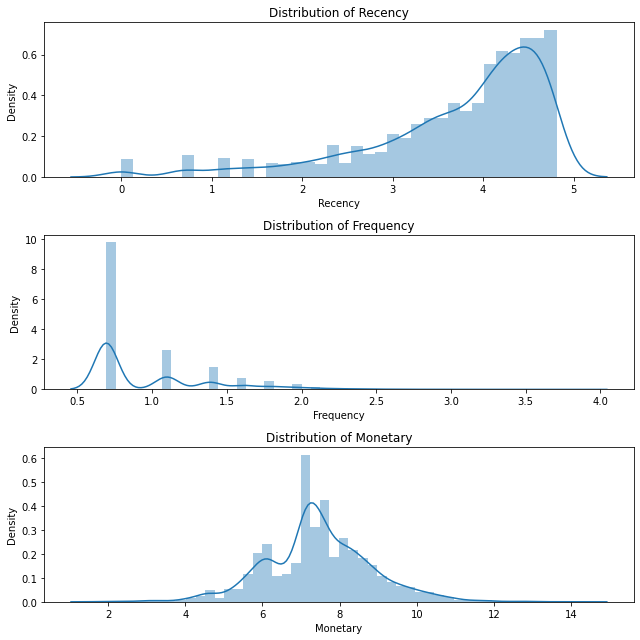

In [289]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [290]:
rfm.describe()

,MobileNo,Recency,Frequency,Monetary
count,4.884000e+03,4884.000000,4884.000000,4.884000e+03
mean,9.158790e+09,56.205979,2.000819,5.452220e+03
std,8.658439e+08,35.133801,2.067170,2.870567e+04
min,6.000567e+09,0.000000,1.000000,5.000000e+00
25%,8.754352e+09,26.000000,1.000000,7.980000e+02
50%,9.500064e+09,56.000000,1.000000,1.590000e+03
75%,9.840593e+09,85.000000,2.000000,3.890000e+03
max,1.000000e+10,122.000000,44.000000,1.426713e+06


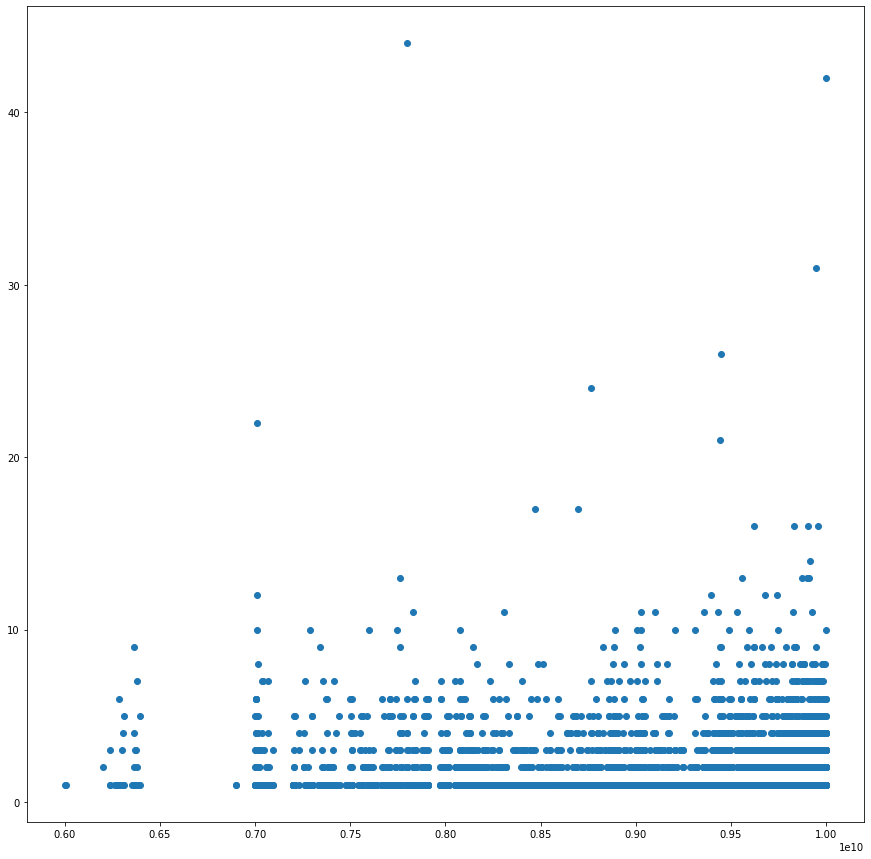

In [291]:
plt.scatter(rfm['MobileNo'],rfm['Frequency'])

In [292]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [293]:
y_predicted = km.fit_predict(rfm[['MobileNo','Recency']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [294]:
recency['cluster']=y_predicted
recency

,MobileNo,Diff,cluster
0,6000567125,3,2
1,6005564227,102,2
2,6200284850,54,2
3,6238130185,76,2
4,6238133938,11,2
...,...,...,...
4879,9999988328,93,1
4880,9999990345,38,1
4881,9999997468,97,1
4882,9999998651,65,1


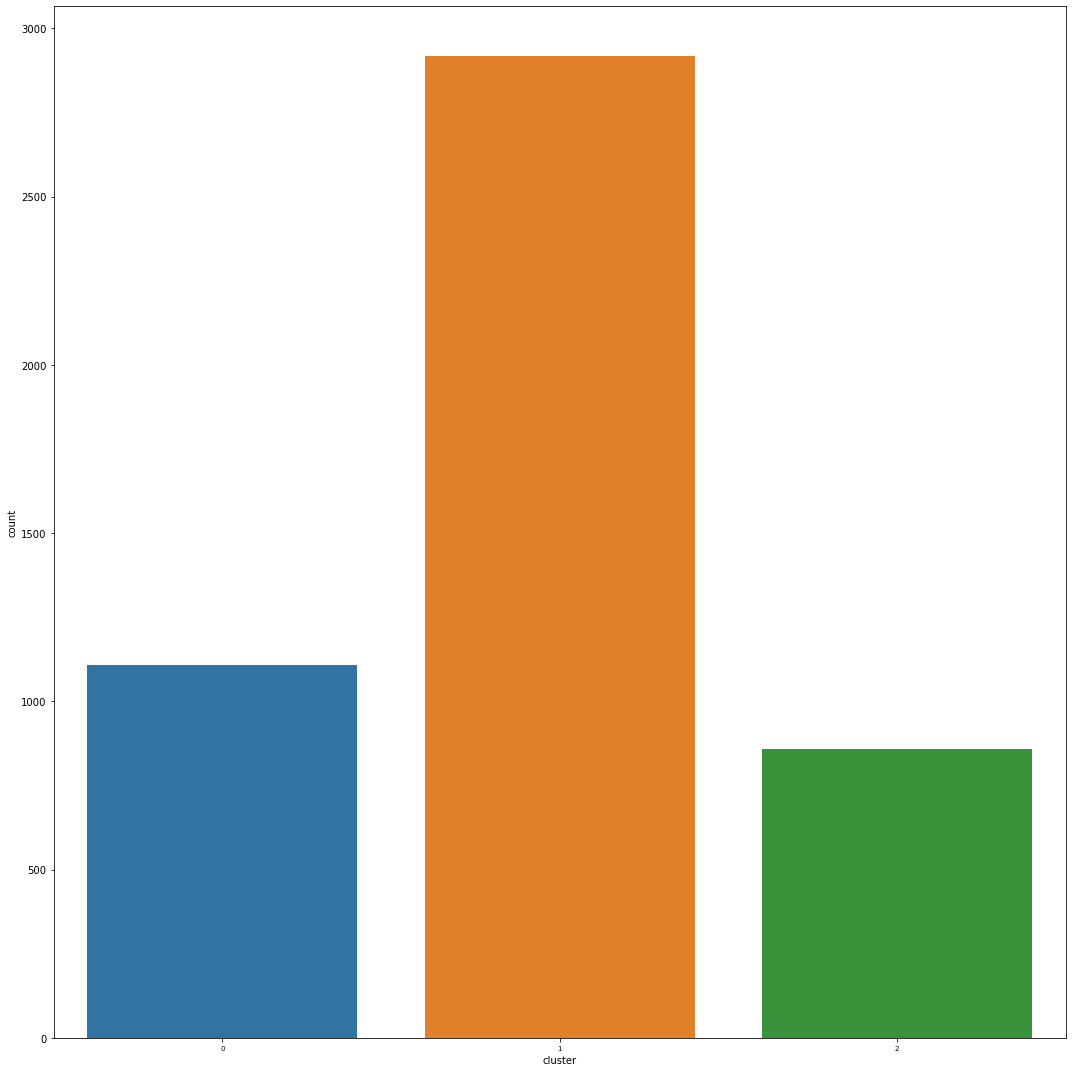

In [295]:
recency
ax = sns.countplot(x="cluster", data=recency)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


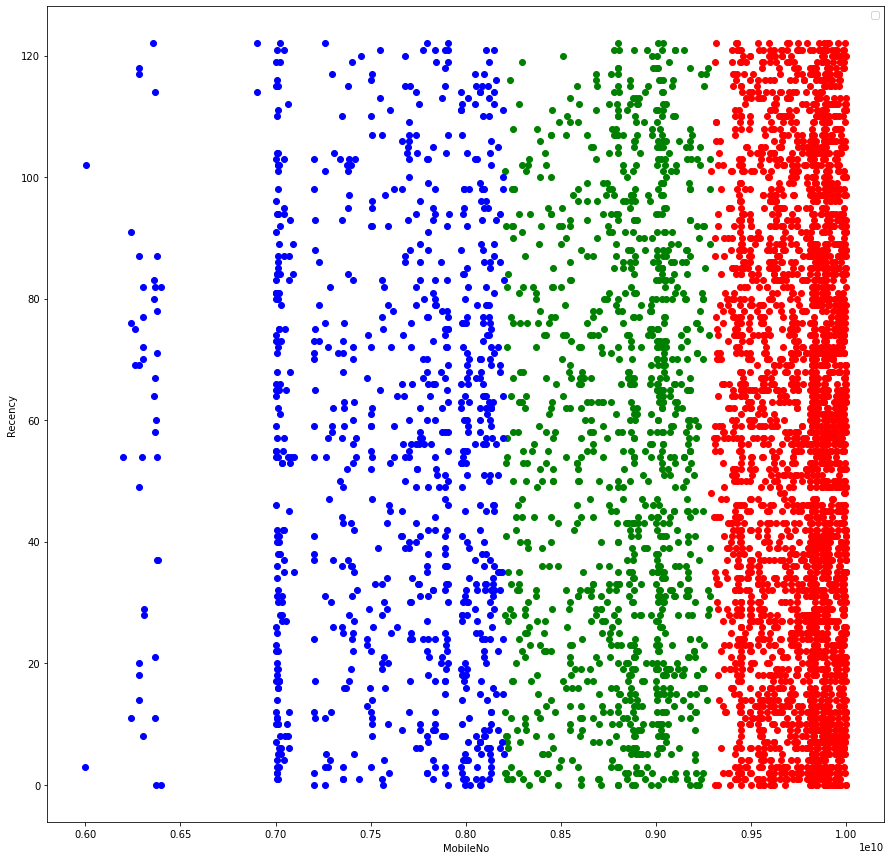

In [296]:
f1 = recency[recency.cluster==0]
f2 = recency[recency.cluster==1]
f3 = recency[recency.cluster==2]

plt.scatter(f1.MobileNo,f1['Diff'],color='green')
plt.scatter(f2.MobileNo,f2['Diff'],color='red')
plt.scatter(f3.MobileNo,f3['Diff'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('Recency') 
plt.legend()

In [297]:
print(f1,f2,f3)
f1.count()

        MobileNo  Diff  cluster
857   8208142890   101        0
858   8208218259    12        0
859   8208267361     2        0
860   8208670412    28        0
861   8208921343    41        0
...          ...   ...      ...
1960  9282213951    98        0
1961  9283373370   103        0
1962  9284019300    39        0
1963  9284102038    31        0
1964  9284263343    89        0

[1108 rows x 3 columns]         MobileNo  Diff  cluster
1965  9289762711   101        1
1966  9290127220    48        1
1967  9302634560    57        1
1968  9304552445    44        1
1969  9308888788    90        1
...          ...   ...      ...
4879  9999988328    93        1
4880  9999990345    38        1
4881  9999997468    97        1
4882  9999998651    65        1
4883  9999999999    64        1

[2919 rows x 3 columns]        MobileNo  Diff  cluster
0    6000567125     3        2
1    6005564227   102        2
2    6200284850    54        2
3    6238130185    76        2
4    6238133938    11      

MobileNo    1108
Diff        1108
cluster     1108
dtype: int64

In [298]:
y_predicted = km.fit_predict(rfm[['MobileNo','Frequency']])
y_predicted

array([2, 2, 2, ..., 1, 1, 1])

In [299]:
frequency['cluster']=y_predicted
frequency

,MobileNo,OrderDate,cluster
0,6000567125,1,2
1,6005564227,1,2
2,6200284850,2,2
3,6238130185,1,2
4,6238133938,3,2
...,...,...,...
4879,9999988328,6,1
4880,9999990345,1,1
4881,9999997468,1,1
4882,9999998651,4,1


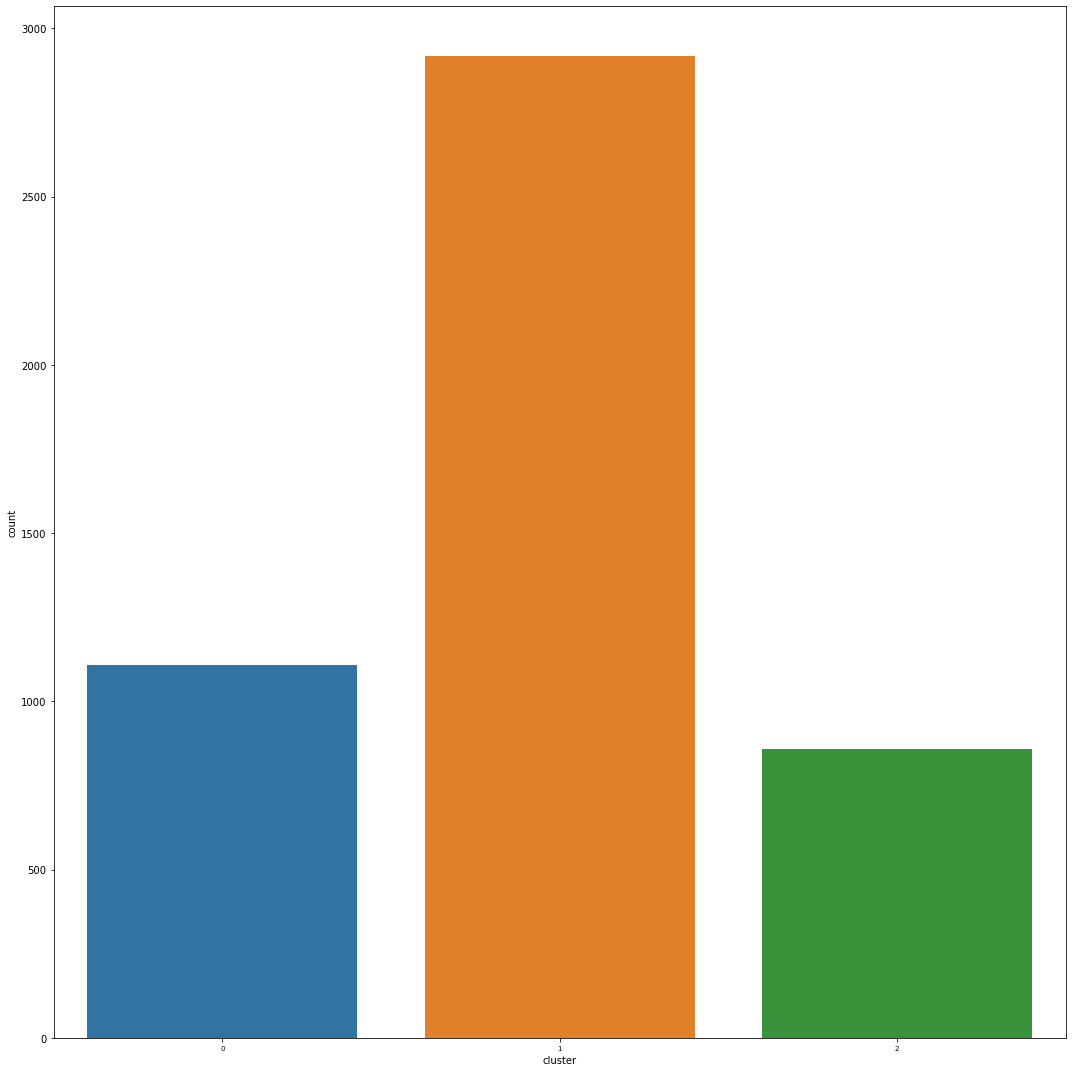

In [300]:
frequency
ax = sns.countplot(x="cluster", data=frequency)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

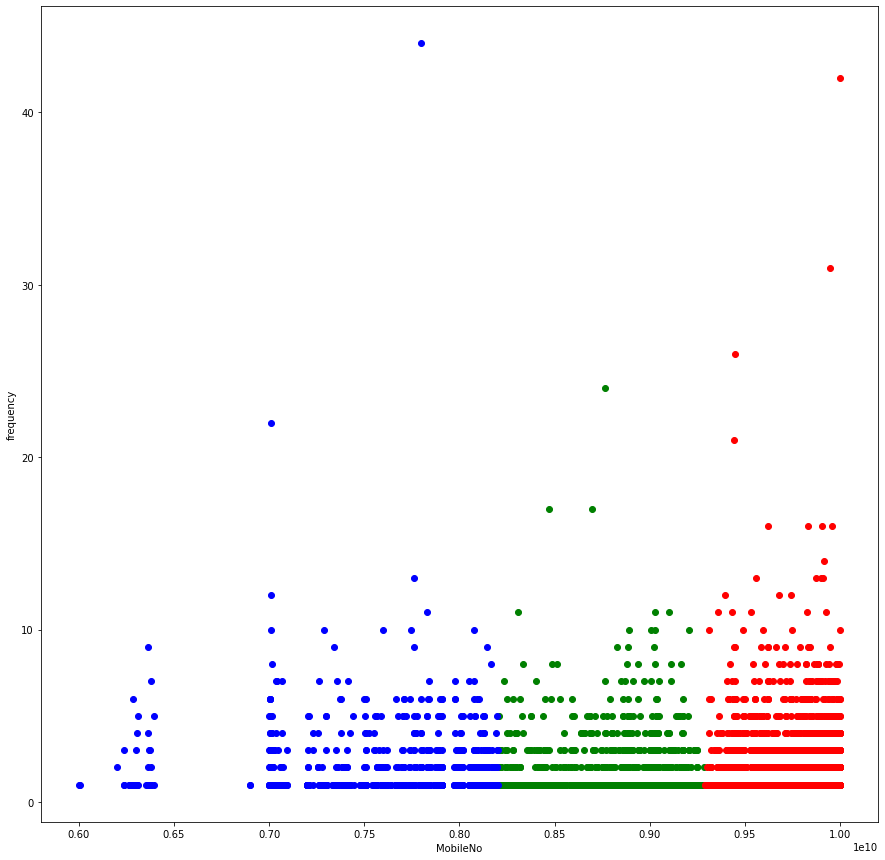

In [301]:
f1 = frequency[frequency.cluster==0]
f2 = frequency[frequency.cluster==1]
f3 = frequency[frequency.cluster==2]

plt.scatter(f1.MobileNo,f1['OrderDate'],color='green')
plt.scatter(f2.MobileNo,f2['OrderDate'],color='red')
plt.scatter(f3.MobileNo,f3['OrderDate'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('frequency')
#plt.legend()
#plt.plot(np.arange(1e6, 3 * 1e7, 1e6))
plt.ticklabel_format(useOffset=False)


#plt.show()

In [302]:
print(f1,f2,f3)
f2

        MobileNo  OrderDate  cluster
857   8208142890          3        0
858   8208218259          3        0
859   8208267361          1        0
860   8208670412          5        0
861   8208921343          1        0
...          ...        ...      ...
1960  9282213951          1        0
1961  9283373370          2        0
1962  9284019300          1        0
1963  9284102038          1        0
1964  9284263343          1        0

[1108 rows x 3 columns]         MobileNo  OrderDate  cluster
1965  9289762711          1        1
1966  9290127220          1        1
1967  9302634560          2        1
1968  9304552445          1        1
1969  9308888788          1        1
...          ...        ...      ...
4879  9999988328          6        1
4880  9999990345          1        1
4881  9999997468          1        1
4882  9999998651          4        1
4883  9999999999         42        1

[2919 rows x 3 columns]        MobileNo  OrderDate  cluster
0    6000567125          1

,MobileNo,OrderDate,cluster
1965,9289762711,1,1
1966,9290127220,1,1
1967,9302634560,2,1
1968,9304552445,1,1
1969,9308888788,1,1
...,...,...,...
4879,9999988328,6,1
4880,9999990345,1,1
4881,9999997468,1,1
4882,9999998651,4,1


In [303]:
y_predicted = km.fit_predict(rfm[['MobileNo','Monetary']])
y_predicted

array([1, 1, 1, ..., 0, 0, 0])

In [304]:
monetary['cluster']=y_predicted
monetary

,MobileNo,TotalBillingAmount,cluster
0,6000567125,790.0,1
1,6005564227,490.0,1
2,6200284850,1580.0,1
3,6238130185,350.0,1
4,6238133938,2475.0,1
...,...,...,...
4879,9999988328,6276.0,0
4880,9999990345,1130.0,0
4881,9999997468,2111.0,0
4882,9999998651,11652.0,0


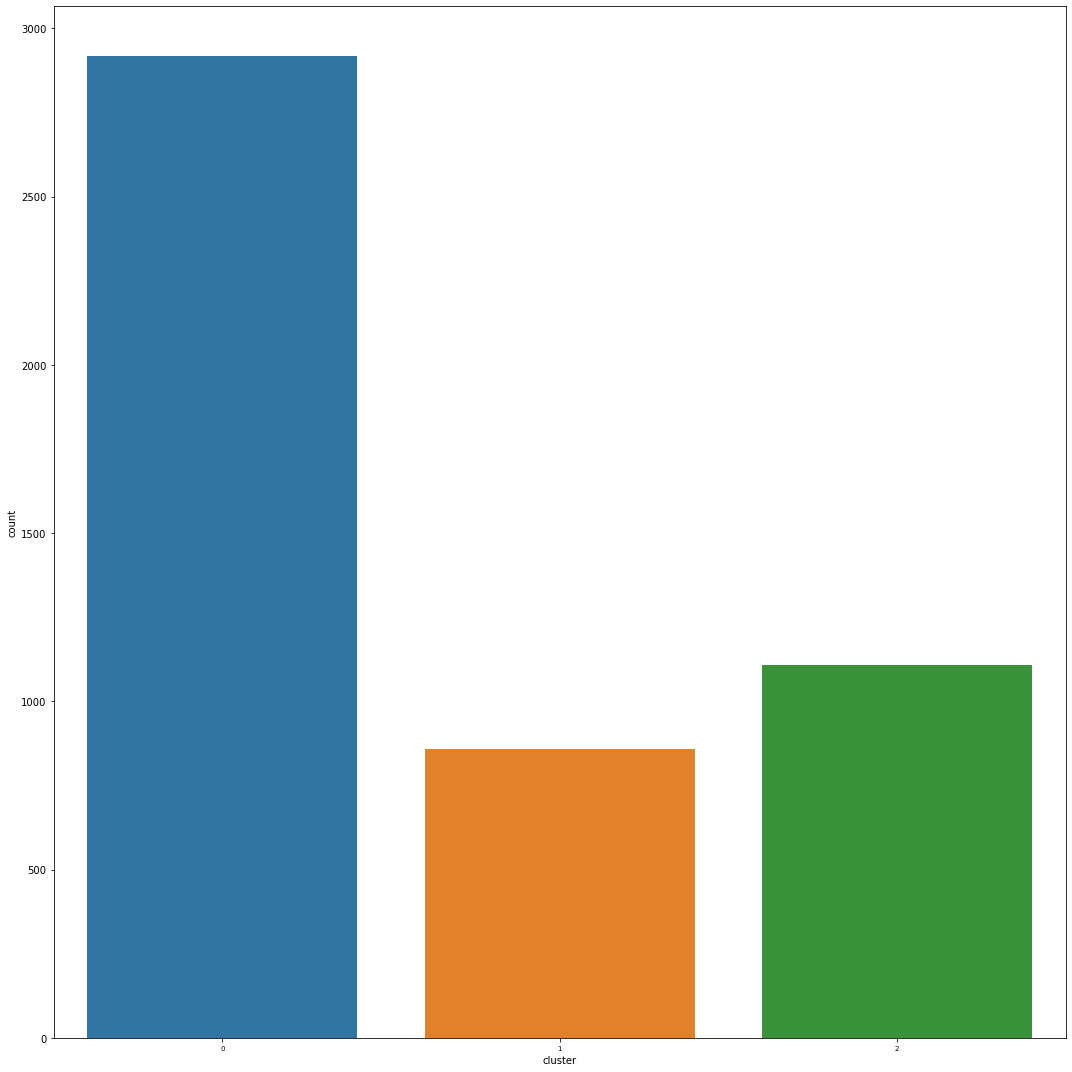

In [305]:
monetary
ax = sns.countplot(x="cluster", data=monetary)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


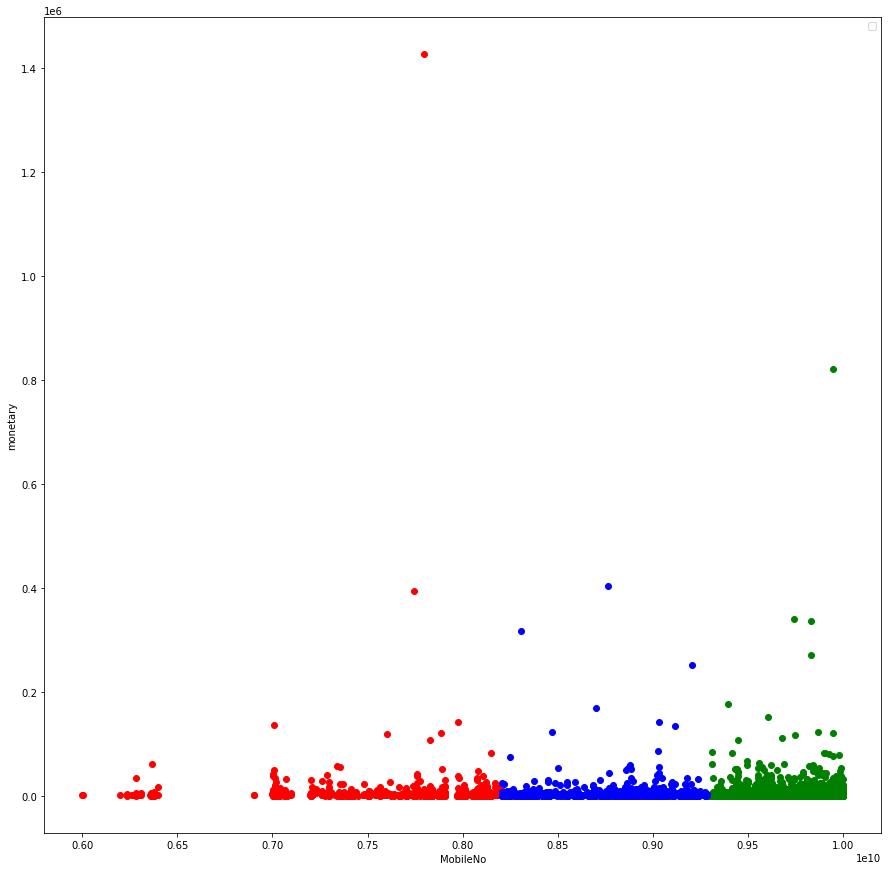

In [306]:
f1 = monetary[monetary.cluster==0]
f2 = monetary[monetary.cluster==1]
f3 = monetary[monetary.cluster==2]

plt.scatter(f1.MobileNo,f1['TotalBillingAmount'],color='green')
plt.scatter(f2.MobileNo,f2['TotalBillingAmount'],color='red')
plt.scatter(f3.MobileNo,f3['TotalBillingAmount'],color='blue')

plt.xlabel('MobileNo')
plt.ylabel('monetary')
plt.legend()

In [307]:
print(f1,f2,f3)
segmented_rfm
ax = sns.countplot(x="Frequency", data=f1)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

        MobileNo  TotalBillingAmount  cluster
1965  9289762711                30.0        0
1966  9290127220              1487.0        0
1967  9302634560               349.0        0
1968  9304552445               445.0        0
1969  9308888788               690.0        0
...          ...                 ...      ...
4879  9999988328              6276.0        0
4880  9999990345              1130.0        0
4881  9999997468              2111.0        0
4882  9999998651             11652.0        0
4883  9999999999               425.0        0

[2919 rows x 3 columns]        MobileNo  TotalBillingAmount  cluster
0    6000567125               790.0        1
1    6005564227               490.0        1
2    6200284850              1580.0        1
3    6238130185               350.0        1
4    6238133938              2475.0        1
..          ...                 ...      ...
852  8197750885               490.0        1
853  8197818801              2936.0        1
854  8197872173   

ValueError: Could not interpret input 'Frequency'

In [308]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [309]:
y_predicted = km.fit_predict(segmented_rfm[['MobileNo','RFM_Segment_score']])
y_predicted

array([0, 0, 0, ..., 3, 3, 3])

In [310]:
segmented_rfm['cluster ']=y_predicted
segmented_rfm


,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score,cluster
0,6000567125,3,1,790.0,1,4,4,1936.0,0
1,6005564227,102,1,490.0,4,4,4,496.0,0
2,6200284850,54,2,1580.0,2,2,3,366.0,0
3,6238130185,76,1,350.0,3,4,4,656.0,0
4,6238133938,11,3,2475.0,1,1,2,242.0,0
...,...,...,...,...,...,...,...,...,...
4879,9999988328,93,6,6276.0,4,1,1,31.0,3
4880,9999990345,38,1,1130.0,2,4,3,732.0,3
4881,9999997468,97,1,2111.0,4,4,2,248.0,3
4882,9999998651,65,4,11652.0,3,1,1,41.0,3


In [311]:
segmented_rfm
RFM_Segment_score
ax = sns.countplot(x="cluster", data=RFM_Segment_score)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

NameError: name 'RFM_Segment_score' is not defined

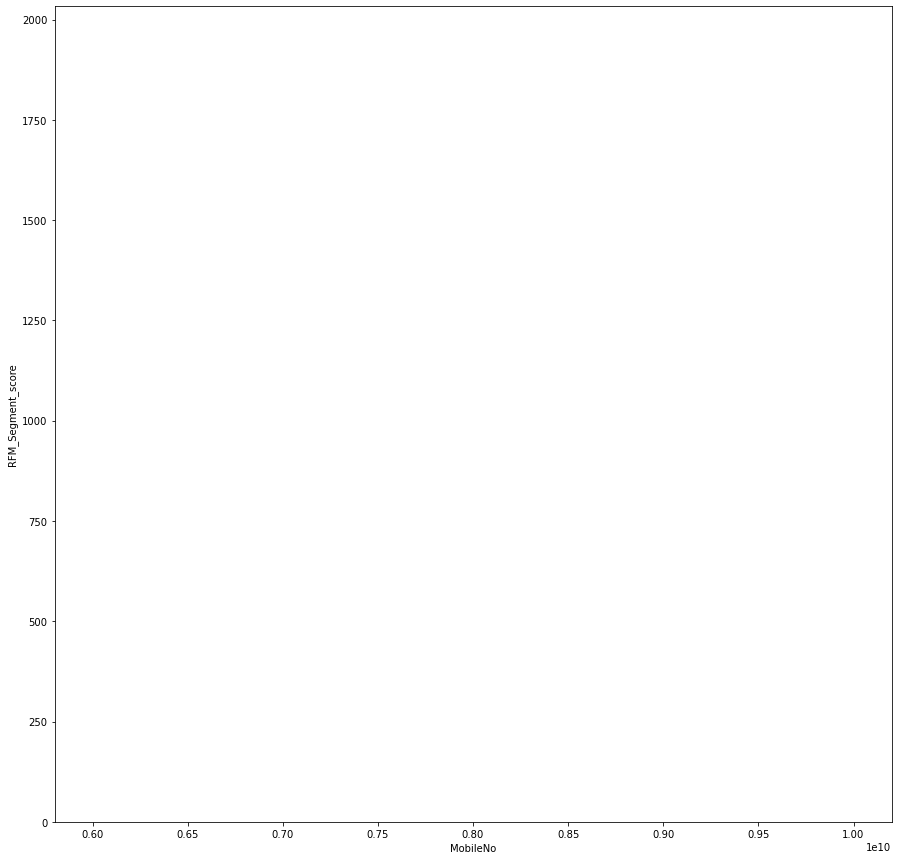

In [312]:
import matplotlib.pyplot as plt
plt.bar(segmented_rfm['MobileNo'],segmented_rfm['RFM_Segment_score'],0.4)
plt.xlabel("MobileNo")
plt.ylabel("RFM_Segment_score")
plt.show()

In [313]:
f1 = segmented_rfm[segmented_rfm.cluster==0]
f2 = segmented_rfm[segmented_rfm.cluster==1]
f3 = segmented_rfm[segmented_rfm.cluster==2]
f4 = segmented_rfm[segmented_rfm.cluster==3]


plt.scatter(f1.MobileNo,f1['RFM_Segment_score'],color='green')
plt.scatter(f2.MobileNo,f2['RFM_Segment_score'],color='red')
plt.scatter(f3.MobileNo,f3['RFM_Segment_score'],color='blue')
plt.scatter(f4.MobileNo,f4['RFM_Segment_score'],color='black')


plt.xlabel('MobileNo')
plt.ylabel('RFM_Segment_score')
plt.legend()


AttributeError: 'DataFrame' object has no attribute 'cluster'

In [ ]:
f10

In [314]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(segmented_rfm[['MobileNo','RFM_Segment_score']])
    sse.append(km.inertia_)

In [315]:
sse

[3.66071532012852e+21,
 8.736248829851553e+20,
 4.014971612965993e+20,
 2.17376592600558e+20,
 1.3579046713529172e+20,
 9.822931563644271e+19,
 7.274210532096161e+19,
 5.486581437205396e+19,
 4.2563123023146705e+19]

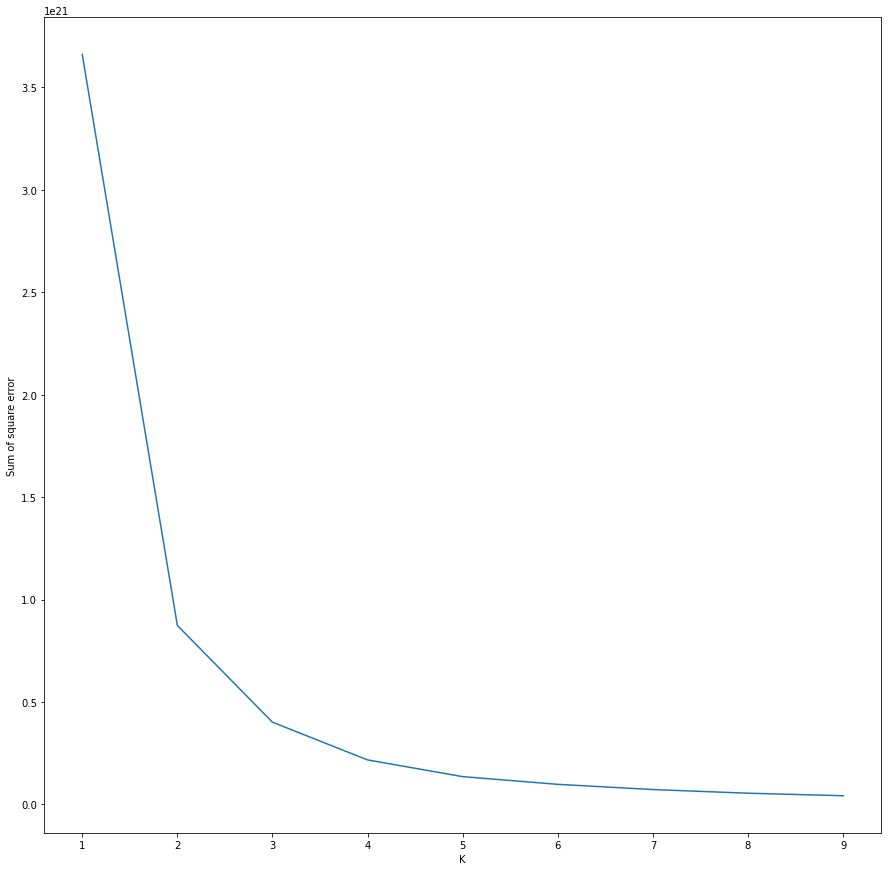

In [316]:
plt.xlabel('K')
plt.ylabel('Sum of square error')
plt.plot(k_rng,sse)

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


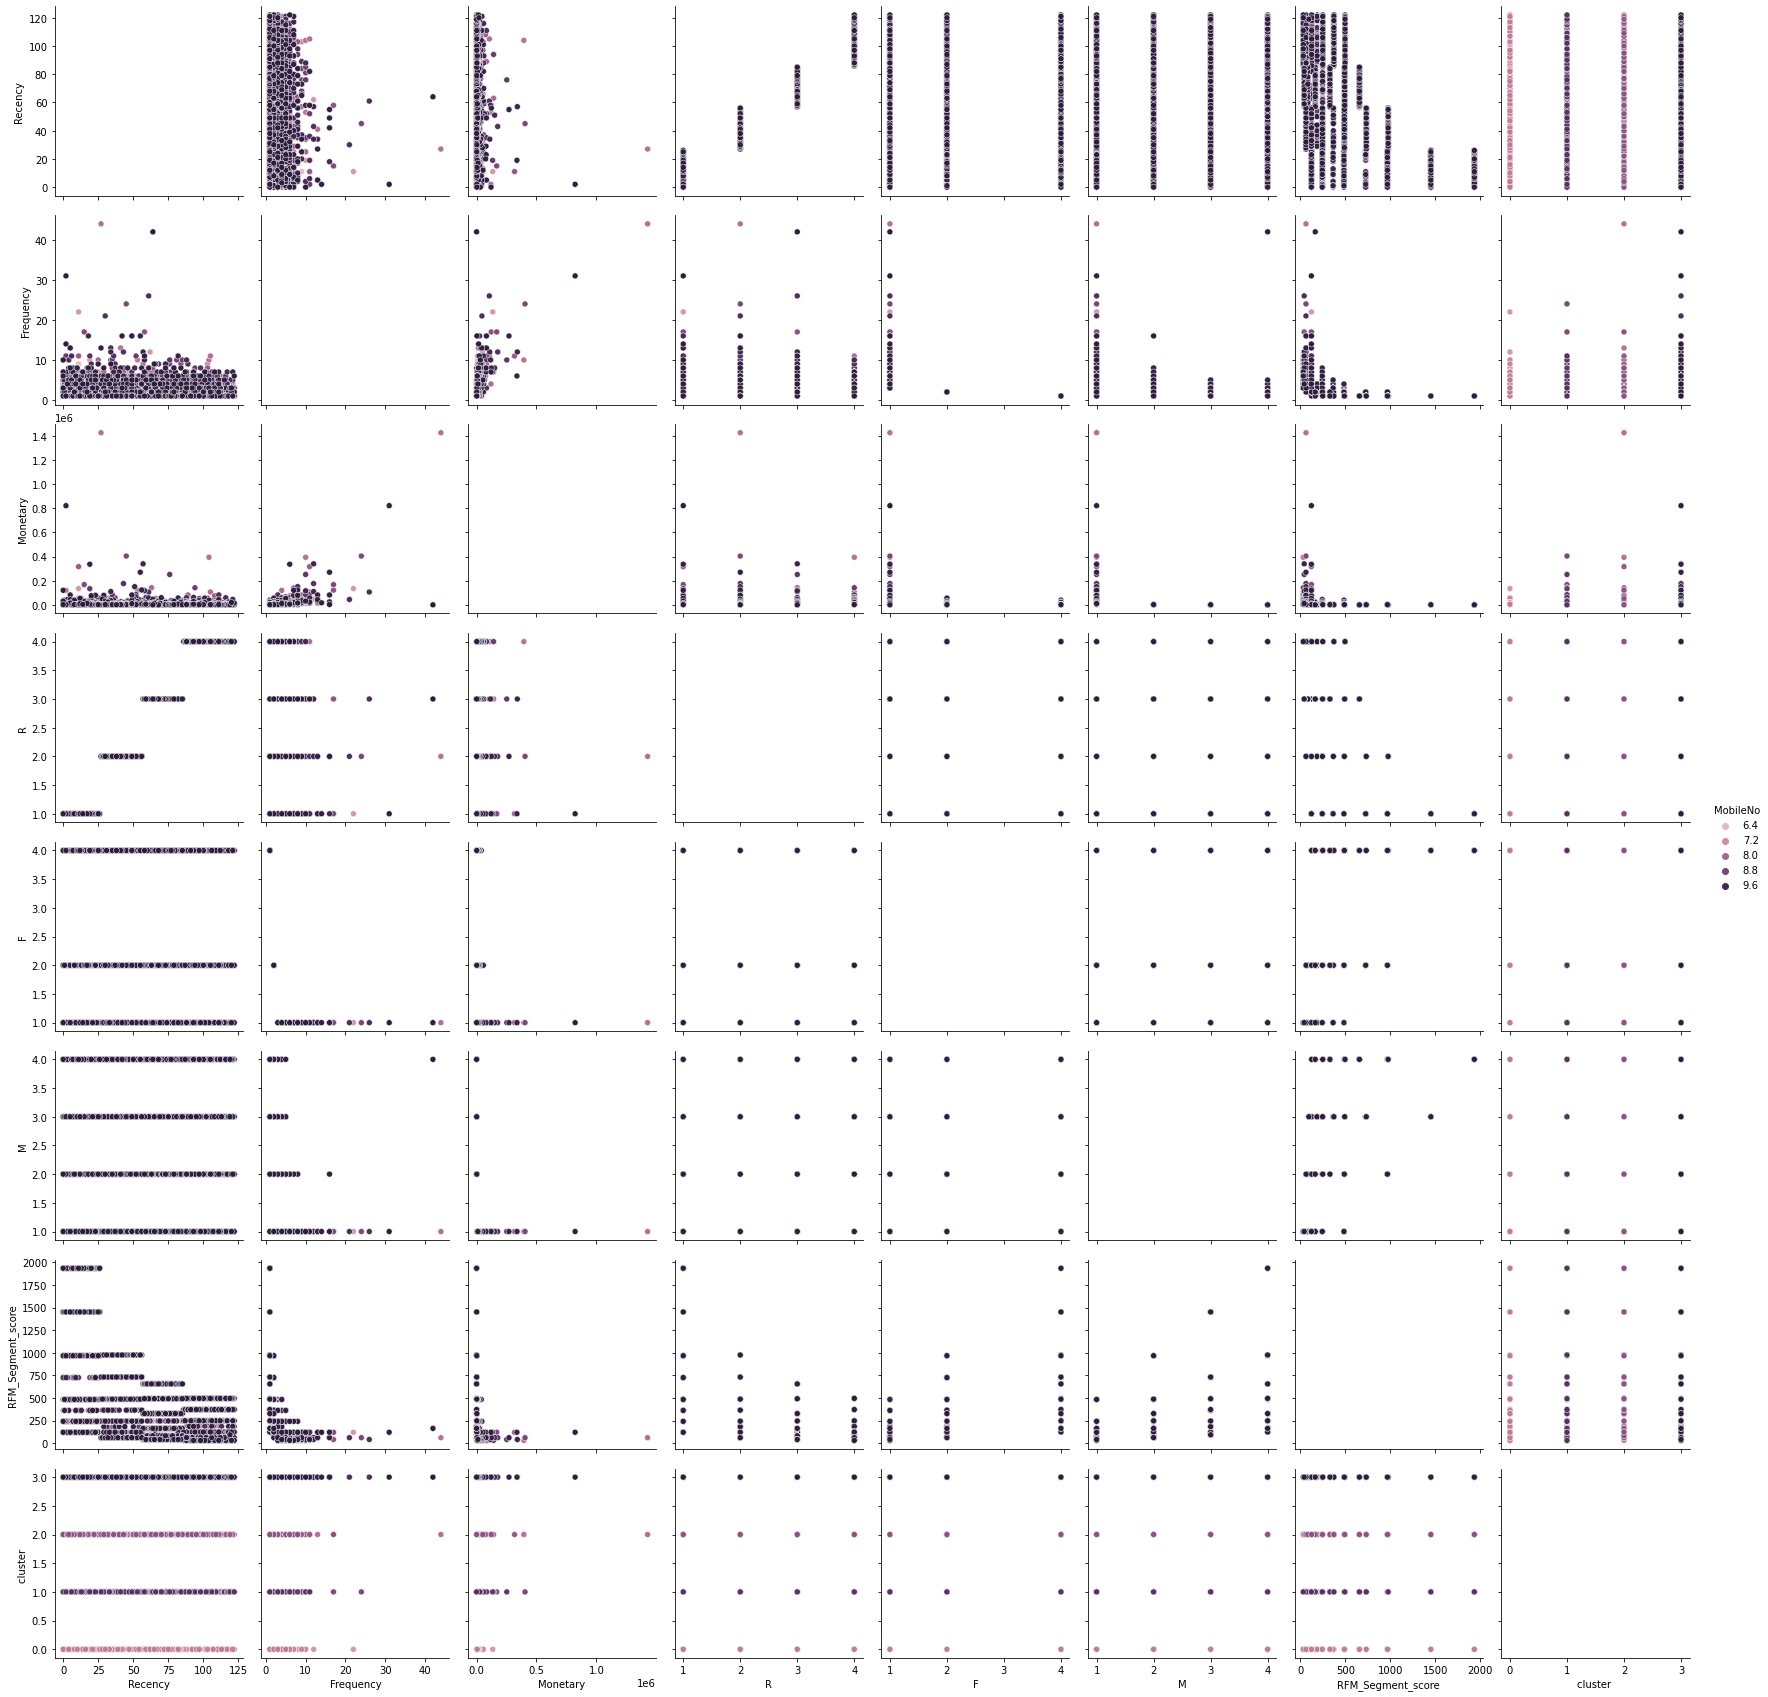

In [318]:
segmented_rfm
sns.pairplot(segmented_rfm,hue='MobileNo',size=3)
plt.show()


In [319]:
segmented_rfm
ax = sns.countplot(x="cluster", data=segmented_rfm)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'cluster'

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot("R", data = segmented_rfm)
plt.xticks(size = 12)
plt.xlabel('R',size=12)
plt.yticks(size = 12)
plt.ylabel('count',size = 12)
plt.show()
#with_hue(ax, segmented_rfm,2,2)


In [320]:
rfm_normalized

,0,1,2,MobileNo,cluster
0,-0.162431,-0.484199,-1.514537,6000567125,1
1,-0.172883,-0.484199,1.303551,6005564227,0
2,-0.134908,-0.000396,-0.062794,6200284850,1
3,-0.177761,-0.484199,0.563447,6238130185,0
4,-0.103726,0.483406,-1.286812,6238133938,1
...,...,...,...,...,...
4879,0.028700,1.934814,1.047361,9999988328,0
4880,-0.150586,-0.484199,-0.518243,9999990345,1
4881,-0.116408,-0.484199,1.161224,9999997468,0
4882,0.216000,0.967209,0.250327,9999998651,0


In [323]:
segmented_rfm.head(23)


,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score,cluster
0,6000567125,3,1,790.0,1,4,4,1936.0,0
1,6005564227,102,1,490.0,4,4,4,496.0,0
2,6200284850,54,2,1580.0,2,2,3,366.0,0
3,6238130185,76,1,350.0,3,4,4,656.0,0
4,6238133938,11,3,2475.0,1,1,2,242.0,0
5,6238303435,91,1,1290.0,4,4,3,372.0,0
6,6261042467,69,1,1890.0,3,4,2,328.0,0
7,6263719628,75,1,1115.0,3,4,3,492.0,0
8,6280648031,49,1,2111.0,2,4,2,488.0,0
9,6281744189,18,1,5050.0,1,4,1,484.0,0


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


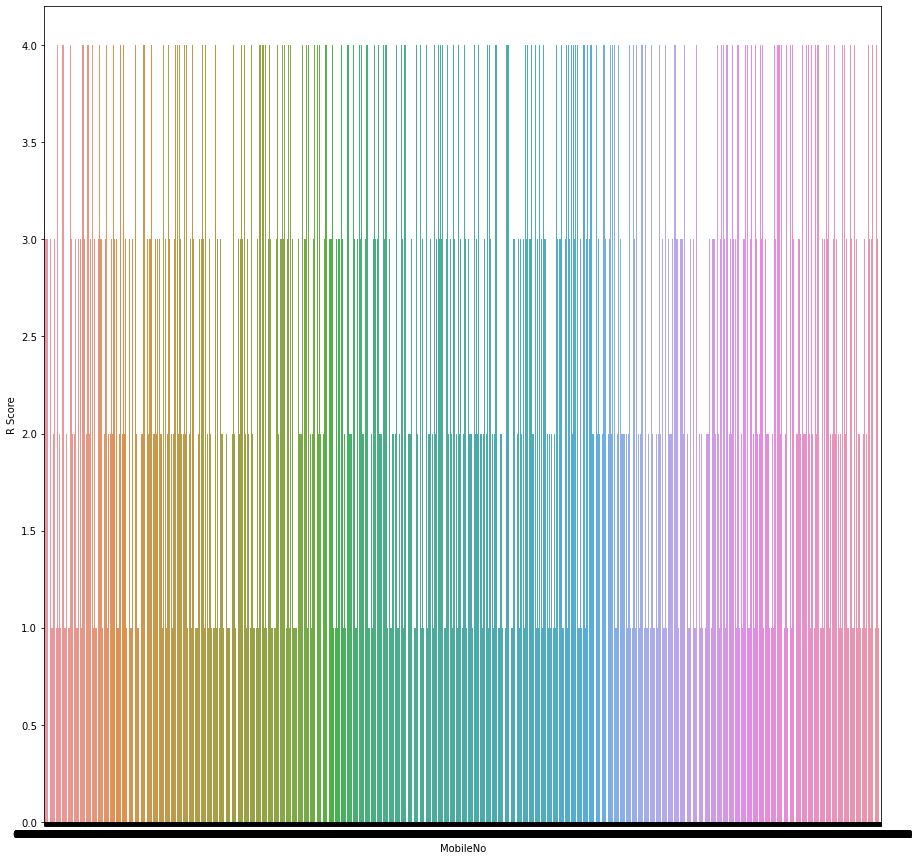

In [328]:
import matplotlib.pyplot as plt
number=segmented_rfm['MobileNo']
score=segmented_rfm['R']
sns.barplot(number,score)
plt.xlabel("MobileNo")
plt.ylabel("R Score")
plt.show()


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


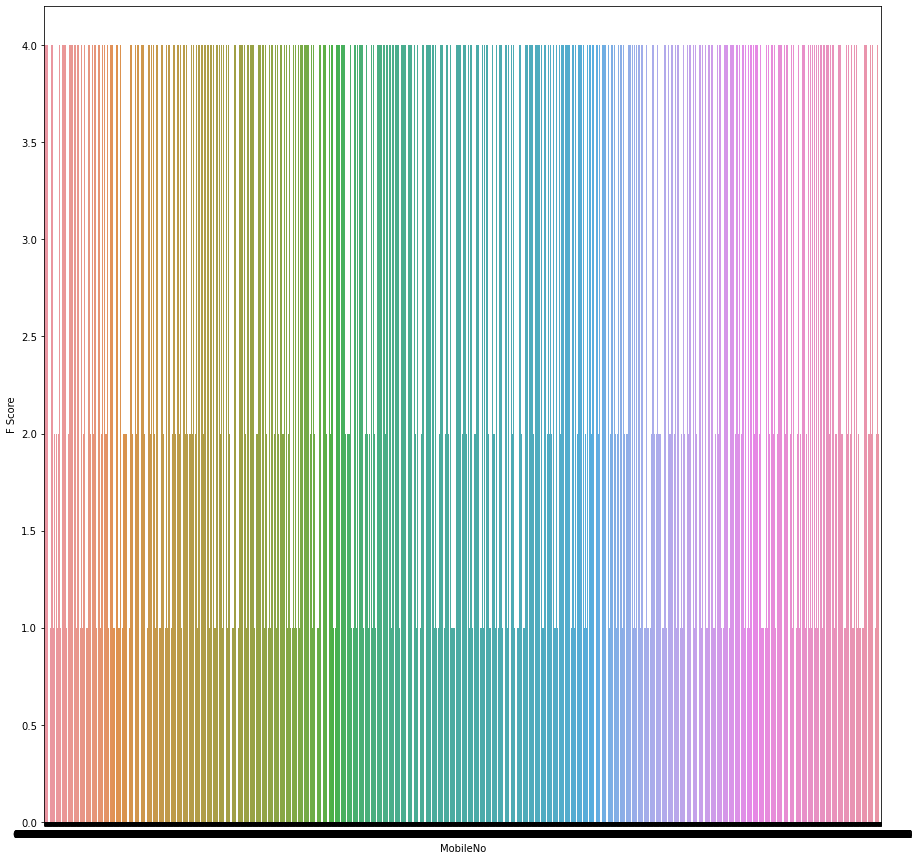

In [325]:
import matplotlib.pyplot as plt
number=segmented_rfm['MobileNo']
score=segmented_rfm['F']
sns.barplot(number,score)
plt.xlabel("MobileNo")
plt.ylabel("F Score")
plt.show()


C:\Users\AGL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


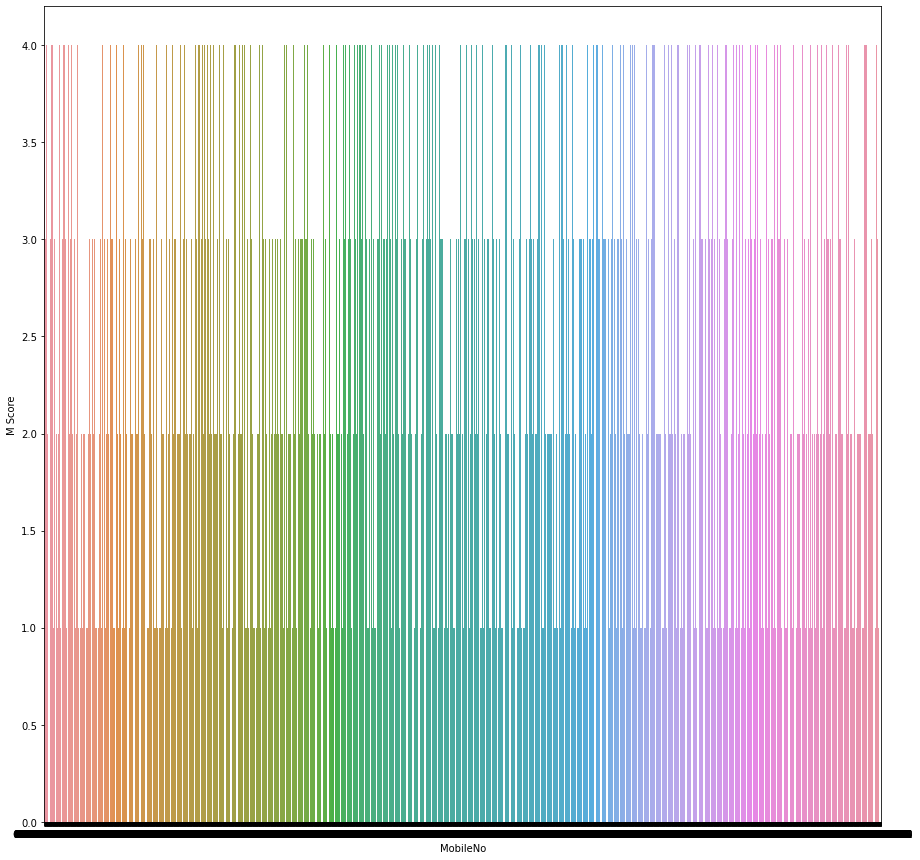

In [326]:
import matplotlib.pyplot as plt
number=segmented_rfm['MobileNo']
score=segmented_rfm['M']
sns.barplot(number,score)
plt.xlabel("MobileNo")
plt.ylabel("M Score")
plt.show()


In [327]:
rfm

,MobileNo,Recency,Frequency,Monetary
0,6000567125,3,1,790.0
1,6005564227,102,1,490.0
2,6200284850,54,2,1580.0
3,6238130185,76,1,350.0
4,6238133938,11,3,2475.0
...,...,...,...,...
4879,9999988328,93,6,6276.0
4880,9999990345,38,1,1130.0
4881,9999997468,97,1,2111.0
4882,9999998651,65,4,11652.0


In [186]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm.head()

,MobileNo,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,6000567125,3,1,790.0,96.149490,30.548731,30.548731
1,6005564227,102,1,490.0,13.106146,30.548731,30.548731
2,6200284850,54,2,1580.0,52.362813,69.236282,69.236282
3,6238130185,76,1,350.0,32.368990,30.548731,30.548731
4,6238133938,11,3,2475.0,88.345516,82.033170,82.033170


In [187]:
#rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * \
    #rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
#rfm['RFM_Score'] *= 0.05
#rfm = rfm.round(2)
#rfm[['MobileNo', 'RFM_Score']].head(7)
 
segmented_rfm['RFM_value'] = (segmented_rfm["Recency"]-segmented_rfm["Frequency"])/segmented_rfm["Monetary"]
segmented_rfm

,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score,cluster,RFM_value
0,6000567125,3,1,790.0,1,4,4,64.00,2,0.002532
1,6005564227,102,1,490.0,4,4,4,28.00,2,0.206122
2,6200284850,54,2,1580.0,2,2,3,15.00,2,0.032911
3,6238130185,76,1,350.0,3,4,4,32.00,2,0.214286
4,6238133938,11,3,2475.0,1,1,2,8.00,2,0.003232
...,...,...,...,...,...,...,...,...,...,...
4879,9999988328,93,6,6276.0,4,1,1,1.75,1,0.013862
4880,9999990345,38,1,1130.0,2,4,3,30.00,1,0.032743
4881,9999997468,97,1,2111.0,4,4,2,14.00,1,0.045476
4882,9999998651,65,4,11652.0,3,1,1,2.00,1,0.005235


In [188]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [189]:
y_predicted = km.fit_predict(segmented_rfm[['MobileNo','RFM_value']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1])

In [190]:
segmented_rfm['cluster']=y_predicted
segmented_rfm.head(23)

,MobileNo,Recency,Frequency,Monetary,R,F,M,RFM_Segment_score,cluster,RFM_value,cluster
0,6000567125,3,1,790.0,1,4,4,64.00,2,0.002532,0
1,6005564227,102,1,490.0,4,4,4,28.00,2,0.206122,0
2,6200284850,54,2,1580.0,2,2,3,15.00,2,0.032911,0
3,6238130185,76,1,350.0,3,4,4,32.00,2,0.214286,0
4,6238133938,11,3,2475.0,1,1,2,8.00,2,0.003232,0
5,6238303435,91,1,1290.0,4,4,3,21.00,2,0.069767,0
6,6261042467,69,1,1890.0,3,4,2,16.00,2,0.035979,0
7,6263719628,75,1,1115.0,3,4,3,24.00,2,0.066368,0
8,6280648031,49,1,2111.0,2,4,2,20.00,2,0.022738,0
9,6281744189,18,1,5050.0,1,4,1,16.00,2,0.003366,0


f1 = rfm[rfm.cluster == 0]
f2 = rfm[rfm.cluster==1]
f3 = rfm[rfm.cluster==2]
f4 = rfm[rfm.cluster==3]

plt.scatter(f1.MobileNo,f1['RFM_Score'],color='green')
plt.scatter(f2.MobileNo,f2['RFM_Score'],color='red')
plt.scatter(f3.MobileNo,f3['RFM_Score'],color='blue')
plt.scatter(f4.MobileNo,f4['RFM_Score'],color='black')

plt.xlabel('MobileNo')
plt.ylabel('RFM_Score')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


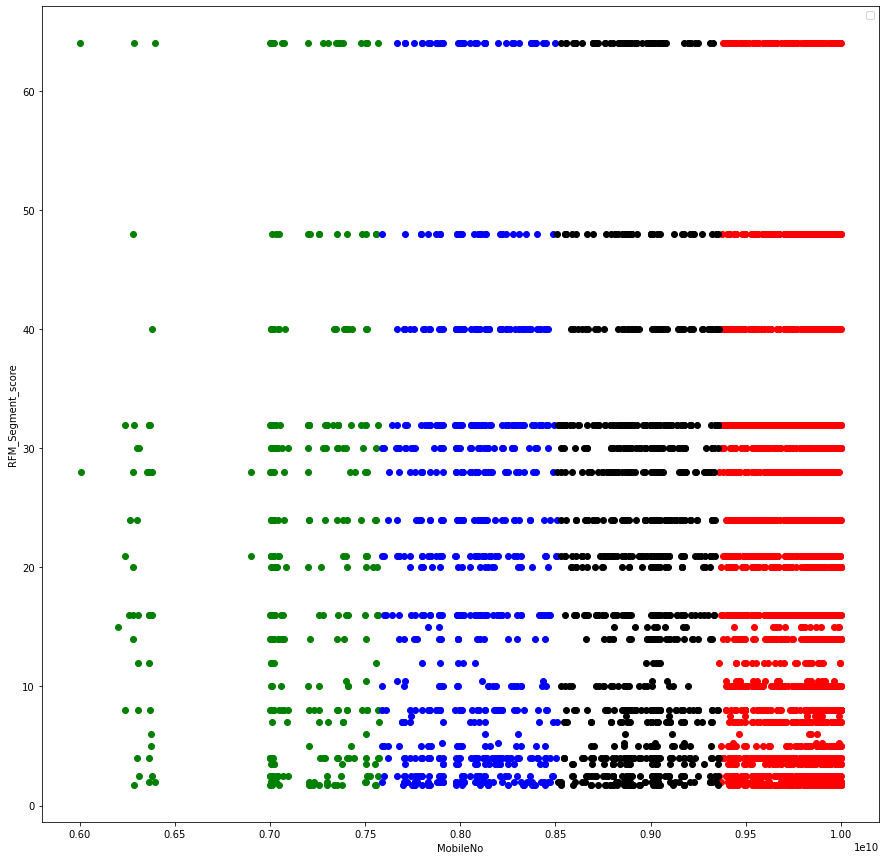

In [231]:
f1 = segmented_rfm[segmented_rfm.cluster == 0] 
f2 = segmented_rfm[segmented_rfm.cluster==1] 
f3 = segmented_rfm[segmented_rfm.cluster==2] 
f4 = segmented_rfm[segmented_rfm.cluster==3]

plt.scatter(f1.MobileNo,f1['RFM_Segment_score'],color='green') 
plt.scatter(f2.MobileNo,f2['RFM_Segment_score'],color='red') 
plt.scatter(f3.MobileNo,f3['RFM_Segment_score'],color='blue') 
plt.scatter(f4.MobileNo,f4['RFM_Segment_score'],color='black')

plt.xlabel('MobileNo') 
plt.ylabel('RFM_Segment_score') 
plt.legend()

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


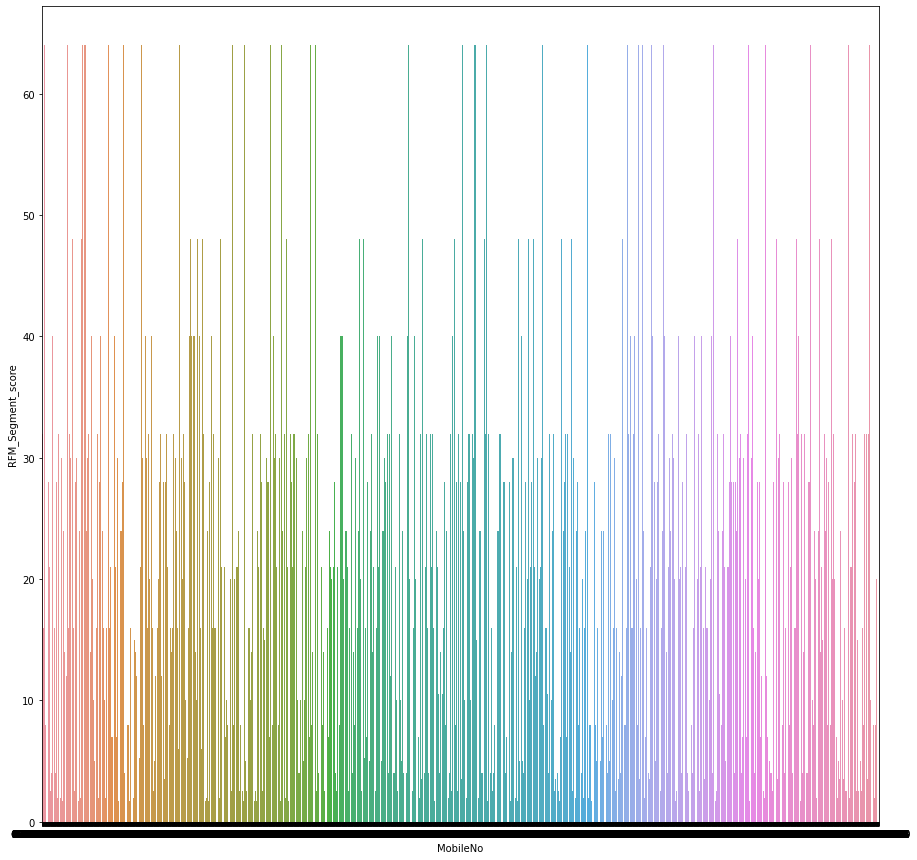

,MobileNo,TotalBillingAmount,cluster
1965,9289762711,30.0,0
1966,9290127220,1487.0,0
1967,9302634560,349.0,0
1968,9304552445,445.0,0
1969,9308888788,690.0,0
...,...,...,...
4879,9999988328,6276.0,0
4880,9999990345,1130.0,0
4881,9999997468,2111.0,0
4882,9999998651,11652.0,0


In [199]:
import matplotlib.pyplot as plt
number=segmented_rfm['MobileNo']
score=segmented_rfm['RFM_Segment_score']
sns.barplot(number,score)
plt.xlabel("MobileNo")
plt.ylabel("RFM_Segment_score")
plt.show()
f1

In [201]:
print(f1,f2,f3)

        MobileNo  TotalBillingAmount  cluster
1965  9289762711                30.0        0
1966  9290127220              1487.0        0
1967  9302634560               349.0        0
1968  9304552445               445.0        0
1969  9308888788               690.0        0
...          ...                 ...      ...
4879  9999988328              6276.0        0
4880  9999990345              1130.0        0
4881  9999997468              2111.0        0
4882  9999998651             11652.0        0
4883  9999999999               425.0        0

[2919 rows x 3 columns]        MobileNo  TotalBillingAmount  cluster
0    6000567125               790.0        1
1    6005564227               490.0        1
2    6200284850              1580.0        1
3    6238130185               350.0        1
4    6238133938              2475.0        1
..          ...                 ...      ...
852  8197750885               490.0        1
853  8197818801              2936.0        1
854  8197872173   

In [202]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["Red","green","blue","black"]
rfm['Color'] = rfm['cluster'].map(lambda p: Colors[p])
ax = rfm.plot(
    kind="scatter",
    x="Recency", y="Monetary",
    figsize=(10,8),
    c = rfm['Color']
    )

KeyError: 'cluster'

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

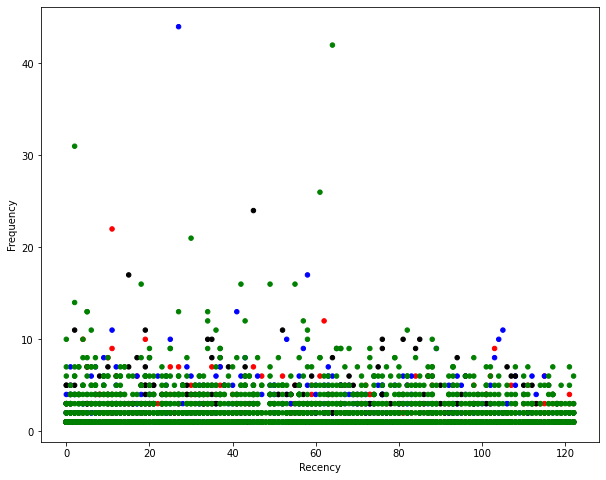

In [221]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["Red","green","blue","black"]
segmented_rfm['Color'] = segmented_rfm['cluster'].map(lambda p: Colors[p])
ax = rfm.plot(
    kind="scatter",
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = segmented_rfm['Color']
    )

<Figure size 504x504 with 0 Axes>

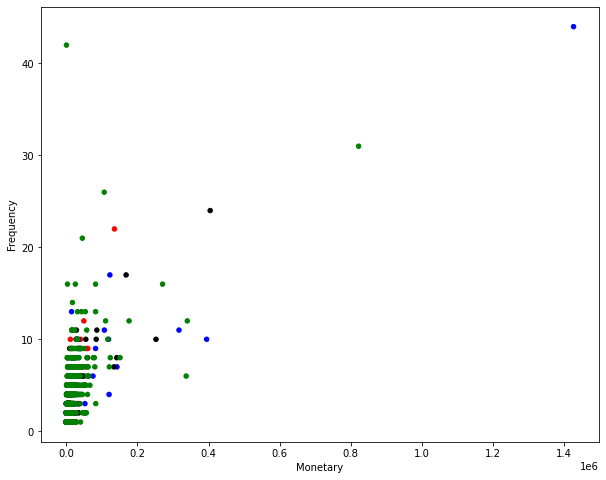

In [222]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["Red","green","blue","black"]
segmented_rfm['Color'] = segmented_rfm['cluster'].map(lambda p: Colors[p])
ax = segmented_rfm.plot(
    kind="scatter",
    x="Monetary", y="Frequency",
    figsize=(10,8),
    c = segmented_rfm['Color']
    )

<Figure size 504x504 with 0 Axes>

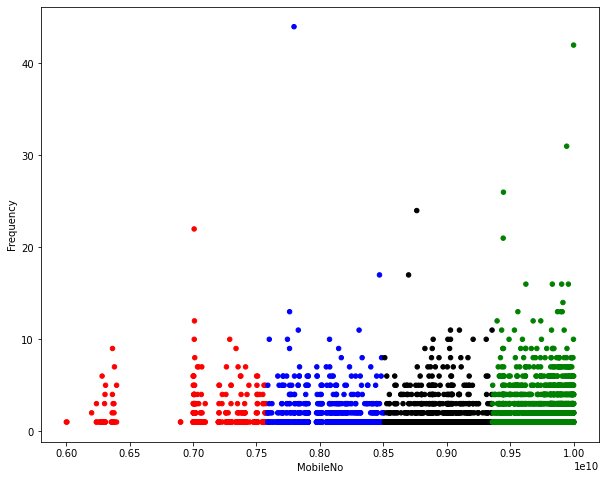

In [223]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["Red","green","blue","black"]
segmented_rfm['Color'] = segmented_rfm['cluster'].map(lambda p: Colors[p])
ax = rfm.plot(
    kind="scatter",
    x="MobileNo", y="Frequency",
    figsize=(10,8),
    c = segmented_rfm['Color']
    )

<Figure size 504x504 with 0 Axes>

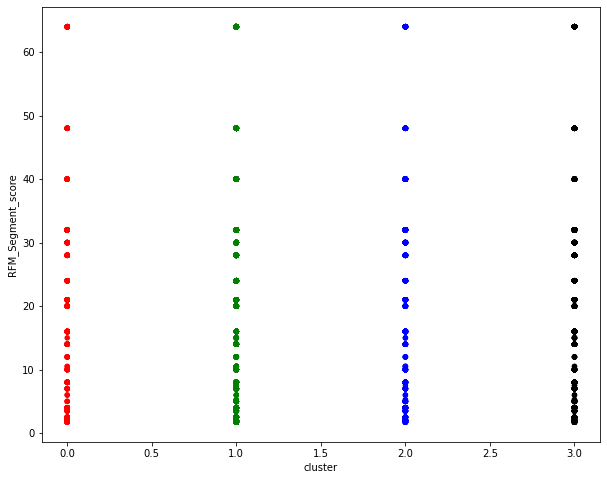

In [220]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

Colors = ["Red","green","blue","black"]
segmented_rfm['Color'] = segmented_rfm['cluster'].map(lambda p: Colors[p])
ax = segmented_rfm.plot(
    kind="scatter",
    x="cluster", y="RFM_Segment_score",
    figsize=(10,8),
    c = segmented_rfm['Color']
    )

C:\Users\AGL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


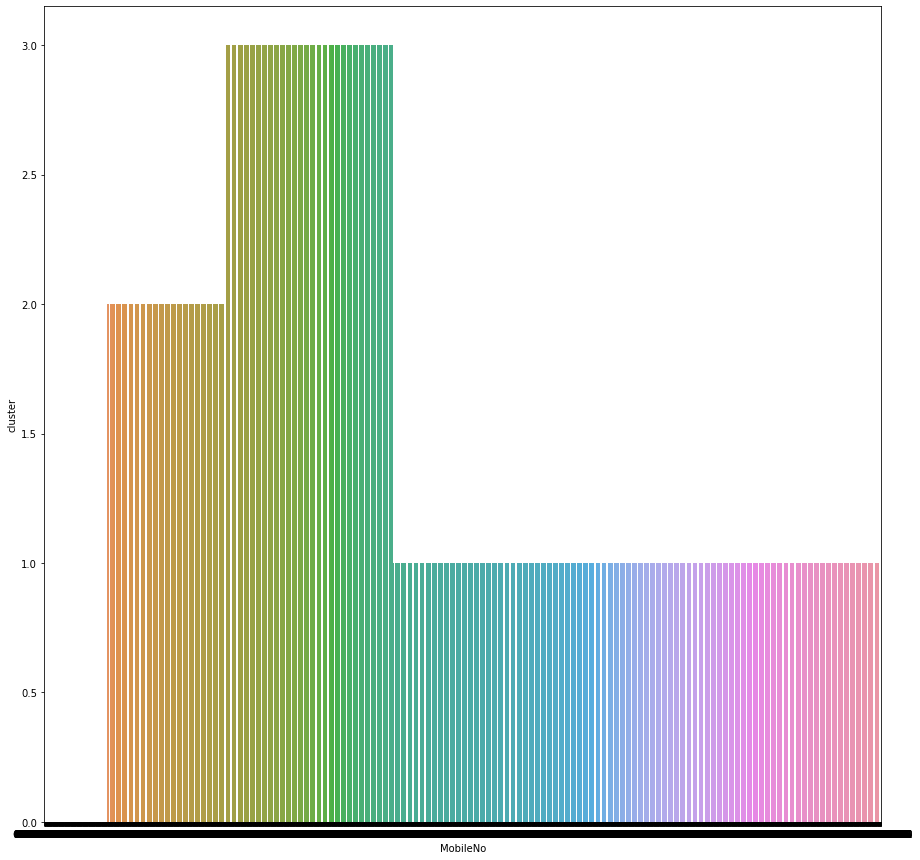

In [224]:
import matplotlib.pyplot as plt
number=segmented_rfm['MobileNo']
score=segmented_rfm['cluster']
sns.barplot(number,score)
plt.xlabel("MobileNo")
plt.ylabel("cluster")
plt.show()

In [225]:
df.nunique("f1")

ValueError: No axis named f1 for object type DataFrame

In [226]:
df1=df['MobileNo'].nunique()


In [227]:
df.drop_duplicates()

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount,Diff
0,WMA220501001925,9884887073,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0,122 days 22:38:01.403000
1,WMA220501011241,9419738830,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0,122 days 21:44:45.533000
2,WMA220501013210,9035570879,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0,122 days 21:25:16.453000
3,WMA220501013819,9035570879,2022-05-01 01:38:19.627,AOD22000003,ACC22000009,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,990J0M65MU0-010,1.0,1315.0,1315.0,1315.0,122 days 21:19:07.743000
4,WMA220501062333,8801444525,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0,122 days 16:33:53.473000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11865,WMA220831222349,7994330730,2022-08-31 22:23:49.527,AOD22000019,ACC22000030,ktabdulnasar1959@gmail.com,Abdul Nasar K T,"Sana House, Karanthat","Po Karanthat, Kunnaru, Via) Ramanthali",Near Kunnaru AUP School,KANNUR,KERALA,990J0M66T13-090,1.0,290.0,0.0,290.0,0 days 00:33:37.843000
11867,WMA220831223516,9811829429,2022-08-31 22:35:16.750,AOD22000049,ACC22000093,Santhoshnva0004@gmail.com,Mullu siva santhosh Kumar,"House no 92 , first floor",Sector 10,Behind civil hospital,GURGAON,HARYANA,990J0M72RA3-010,1.0,350.0,350.0,350.0,0 days 00:22:10.620000
11868,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M999L1-440,1.0,550.0,827.0,1799.0,0 days 00:20:56.717000
11869,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M99911-110,1.0,1249.0,827.0,1799.0,0 days 00:20:56.717000


In [228]:

df['MobileNo'] = df['MobileNo'].astype('int64') 
df

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount,Diff
0,WMA220501001925,9884887073,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0,122 days 22:38:01.403000
1,WMA220501011241,9419738830,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0,122 days 21:44:45.533000
2,WMA220501013210,9035570879,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0,122 days 21:25:16.453000
3,WMA220501013819,9035570879,2022-05-01 01:38:19.627,AOD22000003,ACC22000009,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,990J0M65MU0-010,1.0,1315.0,1315.0,1315.0,122 days 21:19:07.743000
4,WMA220501062333,8801444525,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0,122 days 16:33:53.473000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11865,WMA220831222349,7994330730,2022-08-31 22:23:49.527,AOD22000019,ACC22000030,ktabdulnasar1959@gmail.com,Abdul Nasar K T,"Sana House, Karanthat","Po Karanthat, Kunnaru, Via) Ramanthali",Near Kunnaru AUP School,KANNUR,KERALA,990J0M66T13-090,1.0,290.0,0.0,290.0,0 days 00:33:37.843000
11867,WMA220831223516,9811829429,2022-08-31 22:35:16.750,AOD22000049,ACC22000093,Santhoshnva0004@gmail.com,Mullu siva santhosh Kumar,"House no 92 , first floor",Sector 10,Behind civil hospital,GURGAON,HARYANA,990J0M72RA3-010,1.0,350.0,350.0,350.0,0 days 00:22:10.620000
11868,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M999L1-440,1.0,550.0,827.0,1799.0,0 days 00:20:56.717000
11869,WMA220831223630,8800066069,2022-08-31 22:36:30.653,AOD22000056,ACC22000072,harshitmohan29@gmail.com,Harshit Mohan,A 170,Govindpuram Near Lg showroom,Ghaziabad,GHAZIABAD,UTTAR PRADESH,990J0M99911-110,1.0,1249.0,827.0,1799.0,0 days 00:20:56.717000


In [229]:
df1 = df.drop_duplicates(subset = ["MobileNo"])
df1

,Web_Order_ID,MobileNo,OrderDate,OrderNo,EnqNo,EmailId,CustomerName,Address1,Address2,Address3,Location,State,PartNo,Qty,PartMRP,AmountPaid,TotalBillingAmount,Diff
0,WMA220501001925,9884887073,2022-05-01 00:19:25.967,AOD22000006,ACC22000010,gbabu88@gmail.com,Ganesh Babu,62B,"Annai Velankanni Nagar Phase 2, Mugalivakkam",Next to Shakthi Super Market,CHENNAI,TAMIL NADU,990J0M55R02-020,1.0,1090.0,870.0,1090.0,122 days 22:38:01.403000
1,WMA220501011241,9419738830,2022-05-01 01:12:41.837,AOD22000001,ACC22000002,manishsabraj@gmail.com,Manish Sabraj,Quarter No 3,Manu Marg,SMVD UNIVERSITY Katra,JAMMU,JAMMU AND KASHMIR,990J0M81RA3-010,1.0,1390.0,0.0,1390.0,122 days 21:44:45.533000
2,WMA220501013210,9035570879,2022-05-01 01:32:10.917,AOD22000009,ACC22000020,dsk275@outlook.com,Shashikiran D,"House No. 275, First Main, White City Layout,","Seegehalli, Krishanarajapuram, Bangalore",Next to VITALS Hospital / Diagnostics,BANGALORE,KARNATAKA,75901M65MF0,1.0,2288.0,1711.0,2288.0,122 days 21:25:16.453000
4,WMA220501062333,8801444525,2022-05-01 06:23:33.897,AOD22000009,ACC22000012,snmohtada@gmail.com,Syed Mohtada,16-10-48/B,New Malakpet,Nalgonda X Road Flyover Bridge,HYDERABAD,TELANGANA,990J0M82P13-210,1.0,699.0,0.0,1798.0,122 days 16:33:53.473000
8,WMA220501083050,9958870078,2022-05-01 08:30:51.167,AOD22000009,ACC22000019,verma280186ing1@gmail.com,Rachit Verma,"5/S-6,",Rajajipuram,3rd house from Sparsh Pathology,LUCKNOW,UTTAR PRADESH,77250M79M10-0PG,1.0,480.0,1070.0,1070.0,122 days 14:26:36.203000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11862,WMA220831215351,9387202022,2022-08-31 21:53:51.450,AOD22000036,ACC22000075,kbsaju@gmail.com,Saju. K B,K Balan document writing office,Near sub register office chathamangalm,Sub register office chathamangalm,CALICUT,KERALA,990J0M999KC-350,1.0,325.0,325.0,325.0,0 days 01:03:35.920000
11863,WMA220831215948,9619509856,2022-08-31 21:59:48.980,AOD22000053,ACC22000075,abdulazizpadiyar@gmail.com,Abdul Aziz Padiyar,10 Chancellor House,"1st Hasanabad Lane, Santa Cruz West",Near Masjid,MUMBAI,MAHARASHTRA,990J0M999B7-050,2.0,1090.0,327.0,2180.0,0 days 00:57:38.390000
11864,WMA220831221058,7907746466,2022-08-31 22:10:59.113,AOD22000007,ACC22000029,ananthuinnet@gmail.com,Ananthu Jayan,Thazhathuparambil House,"Amayannoor P.O , Amayannoor",Opposite Sree Dharma Shastha Temple Amayannoor,KOTTAYAM,KERALA,990J0M999KQ-070,1.0,510.0,282.0,510.0,0 days 00:46:28.257000
11865,WMA220831222349,7994330730,2022-08-31 22:23:49.527,AOD22000019,ACC22000030,ktabdulnasar1959@gmail.com,Abdul Nasar K T,"Sana House, Karanthat","Po Karanthat, Kunnaru, Via) Ramanthali",Near Kunnaru AUP School,KANNUR,KERALA,990J0M66T13-090,1.0,290.0,0.0,290.0,0 days 00:33:37.843000


In [230]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

perc = np.linspace(0,100,len(data))
data = segmented_rfm["Monetary"]
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)

ax.plot(perc, data)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.show()

NameError: name 'data' is not defined

In [ ]:
ax = sns.histplot(segmented_rfm, x="RFM_Segment_score", hue="MobileNo")
sns.move_legend(ax, "Monetary")
plt.show()


In [ ]:
df=df.nunique(df['MobileNo'])


In [856]:
df=df.nunique(rfm["mobile"])
df
df1=rfm.nunique(f1['MobileNo'])

KeyError: 'mobile'